In [7]:
import sqlite3
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

In [8]:
%load_ext autoreload

In [9]:
%autoreload 2

In [4]:
# book_details=pd.read_csv('Data/Book_Details.csv')
book_details=pd.read_csv('FINAL_DATA/DATASETS/Final_csv_books.csv',index_col=0)


In [6]:
connection=sqlite3.connect('FINAL_DATA/DATASETS/book_reviews.db')
book_reviews=pd.read_sql_query("SELECT * FROM book_reviews", connection)

In [7]:
book_details.tail()

book_id                                    cover_image_uri  \
10831  183057601  https://images-na.ssl-images-amazon.com/images...   
10849     337100  https://images-na.ssl-images-amazon.com/images...   
10855       9817  https://images-na.ssl-images-amazon.com/images...   
10864   32940867  https://images-na.ssl-images-amazon.com/images...   
10873       9533  https://images-na.ssl-images-amazon.com/images...   

                   book_title  \
10831                    Ours   
10849  The Runes of the Earth   
10855   Ten Days in the Hills   
10864             The Chemist   
10873          The Poe Shadow   

                                            book_details  \
10831             The third and final.Blurb coming soon.   
10849  Beginning ten years after the end of the accla...   
10855  It is the morning after the Academy Awards. Ma...   
10864  In this gripping page-turner, an ex-agent on t...   
10873  Through the eyes of a Baltimore lawyer named Q...   

                         format                      publication_info  \
10831                 ['ebook']           ['Published July 23, 2023']   
10849  ['533 pages, Hardcover']   ['First published October 1, 2004']   
10855  ['450 pages, Hardcover']   ['First published January 1, 2007']   
10864  ['521 pages, Paperback']  ['First published November 8, 2016']   
10873  ['367 pages, Hardcover']   ['First published January 1, 2006']   

                                              authorlink  \
10831  https://www.goodreads.com/author/show/21293689...   
10849  https://www.goodreads.com/author/show/12980.St...   
10855  https://www.goodreads.com/author/show/1339.Jan...   
10864  https://www.goodreads.com/author/show/941441.S...   
10873  https://www.goodreads.com/author/show/6247.Mat...   

                     author num_pages  \
10831         Julie Mannino    [None]   
10849  Stephen R. Donaldson   ['533']   
10855           Jane Smiley   ['450']   
10864       Stephenie Meyer   ['521']   
10873         Matthew Pearl   ['367']   

                                                  genres  num_ratings  \
10831  ['BDSM', 'Romance', 'M M Romance', 'Fantasy', ...           29   
10849  ['Fantasy', 'Fiction', 'Epic Fantasy', 'Scienc...         7306   
10855  ['Fiction', 'Contemporary', 'Romance', 'Litera...         1722   
10864  ['Fiction', 'Thriller', 'Mystery', 'Romance', ...        92978   
10873  ['Historical Fiction', 'Mystery', 'Fiction', '...         9408   

       num_reviews  average_rating  \
10831            5            3.97   
10849          329            3.79   
10855          378            2.56   
10864        10683            3.76   
10873         1010            3.21   

                                     rating_distribution  
10831  {'5': '15', '4': '2', '3': '9', '2': '2', '1':...  
10849  {'5': '2,072', '4': '2,588', '3': '1,905', '2'...  
10855  {'5': '99', '4': '267', '3': '531', '2': '426'...  
10864  {'5': '25,104', '4': '33,876', '3': '23,360', ...  
10873  {'5': '1,284', '4': '2,563', '3': '3,082', '2'...

In [8]:
book_reviews.head()

book_id reviewer_id                   reviewer_name likes_on_review  \
0  57094644   114413220                           Sofia       582 likes   
1  57094644    48328025                   megs_bookrack       329 likes   
2  57094644     6728955                          Mariah       232 likes   
3  57094644   101179363  ale (semi hiatus) ‧ ₊˚୨ ♡ ୧ ₊˚       218 likes   
4   2948832    48727754                          chan ☆       174 likes   

                                      review_content reviewer_followers  \
0  Just when you thought he was done writing book...    7,961 followers   
1  Would you be shocked if I told you this was th...    12.1k followers   
2  So you're telling me Anaisn'ta Daughter of Pos...      490 followers   
3  *inserts vine "anything for you, beyoncé"*upda...    2,709 followers   
4  i was excited about this one since it was so w...    55.1k followers   

  reviewer_total_reviews        review_date      review_rating  
0            234 reviews  February 24, 2021               None  
1          1,802 reviews     March 17, 2024  Rating 5 out of 5  
2          1,263 reviews  September 5, 2022  Rating 3 out of 5  
3            458 reviews       June 3, 2021               None  
4          1,139 reviews       June 9, 2021  Rating 2 out of 5

In [9]:
book_details.describe().map(lambda x: f"{x:0.3f}")

book_id   num_ratings num_reviews average_rating
count      16225.000     16225.000   16225.000      16225.000
mean    10387044.179     85784.531    5156.270          4.002
std     21468088.929    320251.329   15776.460          0.336
min            1.000         0.000       0.000          0.000
25%        94034.000      2950.000     205.000          3.830
50%       944073.000     16232.000     993.000          4.030
75%     11284898.000     55944.000    3457.000          4.210
max    209607645.000  10116247.000  274695.000          5.000

In [10]:
book_reviews.describe()

book_id reviewer_id reviewer_name likes_on_review  \
count     70959       70959         70959           68644   
unique    15693       25509         16380            2333   
top     3751995     4622890     Emily May          1 like   
freq          5         744           744            2136   

                                           review_content reviewer_followers  \
count                                               70959              65696   
unique                                              68981               2360   
top     Come check out my 4 hour 35 minute deep dive i...             Author   
freq                                                    7               8862   

       reviewer_total_reviews       review_date      review_rating  
count                   70959             70959              68878  
unique                   2648              6271                  5  
top                    Author  December 4, 2013  Rating 5 out of 5  
freq                     8862               429              27500

In [11]:
book_details[book_details.book_id==2583561]

book_id                                    cover_image_uri  \
11736  2583561  https://images-na.ssl-images-amazon.com/images...   

          book_title    book_details                    format  \
11736  Coffin County  Coffin Country  ['334 pages, Paperback']   

                       publication_info  \
11736  ['First published May 27, 2008']   

                                              authorlink             author  \
11736  https://www.goodreads.com/author/show/11508.Ga...  Gary A. Braunbeck   

      num_pages                                             genres  \
11736   ['334']  ['Horror', 'Fiction', 'Thriller', 'Fantasy', '...   

       num_ratings  num_reviews  average_rating  \
11736          385           32            3.64   

                                     rating_distribution  
11736  {'5': '100', '4': '127', '3': '94', '2': '47',...

In [12]:
book_reviews[book_reviews['book_id']=='2583561']

book_id reviewer_id    reviewer_name likes_on_review  \
51456  2583561     3102740  Dirk Grobbelaar        26 likes   
51457  2583561     2087548            Kasia         8 likes   
51458  2583561      871072    J.M. Cornwell         6 likes   
51459  2583561      171197        Ben Loory         4 likes   
51460  2583561     6587017            Renae         3 likes   

                                          review_content reviewer_followers  \
51456  I'll come right out and say that this was, fra...    1,142 followers   
51457  This being my second time reading Braunbeck I ...      323 followers   
51458  The end of time postponed in Cedar Hill, Ohio....             Author   
51459  This book is remarkable: one of the bloodiest ...             Author   
51460  I really enjoyed Coffin County! I think out of...        7 followers   

      reviewer_total_reviews      review_date      review_rating  
51456            615 reviews   August 3, 2015  Rating 4 out of 5  
51457            401 reviews  October 9, 2011  Rating 4 out of 5  
51458                 Author   August 4, 2008  Rating 4 out of 5  
51459                 Author  August 11, 2016  Rating 5 out of 5  
51460              8 reviews   April 30, 2012  Rating 5 out of 5

In [13]:
# pd.DataFrame(columns={'Features'},book_details.dtypes)

In [14]:
dtype_details=book_details.dtypes.reset_index()
dtype_reviews=book_reviews.dtypes.reset_index()

In [15]:
dtype_reviews

index       0
0                 book_id  object
1             reviewer_id  object
2           reviewer_name  object
3         likes_on_review  object
4          review_content  object
5      reviewer_followers  object
6  reviewer_total_reviews  object
7             review_date  object
8           review_rating  object

In [16]:
dtype_details

index        0
0               book_id    int64
1       cover_image_uri   object
2            book_title   object
3          book_details   object
4                format   object
5      publication_info   object
6            authorlink   object
7                author   object
8             num_pages   object
9                genres   object
10          num_ratings    int64
11          num_reviews    int64
12       average_rating  float64
13  rating_distribution   object

In [17]:
book_details

book_id                                    cover_image_uri  \
0       57094644  https://images-na.ssl-images-amazon.com/images...   
1         895185  https://images-na.ssl-images-amazon.com/images...   
2        2948832  https://images-na.ssl-images-amazon.com/images...   
3         154126  https://images-na.ssl-images-amazon.com/images...   
4         298663  https://images-na.ssl-images-amazon.com/images...   
...          ...                                                ...   
10831  183057601  https://images-na.ssl-images-amazon.com/images...   
10849     337100  https://images-na.ssl-images-amazon.com/images...   
10855       9817  https://images-na.ssl-images-amazon.com/images...   
10864   32940867  https://images-na.ssl-images-amazon.com/images...   
10873       9533  https://images-na.ssl-images-amazon.com/images...   

                   book_title  \
0        Daughter of the Deep   
1                   The Ghost   
2        Seduce Me at Sunrise   
3      The Discovery of India   
4        The Killer Inside Me   
...                       ...   
10831                    Ours   
10849  The Runes of the Earth   
10855   Ten Days in the Hills   
10864             The Chemist   
10873          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
10831             The third and final.Blurb coming soon.   
10849  Beginning ten years after the end of the accla...   
10855  It is the morning after the Academy Awards. Ma...   
10864  In this gripping page-turner, an ex-agent on t...   
10873  Through the eyes of a Baltimore lawyer named Q...   

                                     format  \
0                  ['352 pages, Hardcover']   
1                  ['384 pages, Hardcover']   
2      ['360 pages, Mass Market Paperback']   
3                  ['656 pages, Paperback']   
4                  ['244 pages, Paperback']   
...                                     ...   
10831                             ['ebook']   
10849              ['533 pages, Hardcover']   
10855              ['450 pages, Hardcover']   
10864              ['521 pages, Paperback']   
10873              ['367 pages, Hardcover']   

                             publication_info  \
0         ['First published January 1, 2021']   
1        ['First published October 23, 2007']   
2      ['First published September 30, 2008']   
3         ['First published January 1, 1946']   
4          ['First published March 13, 1952']   
...                                       ...   
10831             ['Published July 23, 2023']   
10849     ['First published October 1, 2004']   
10855     ['First published January 1, 2007']   
10864    ['First published November 8, 2016']   
10873     ['First published January 1, 2006']   

                                              authorlink  \
0      https://www.goodreads.com/author/show/15872.Ri...   
1      https://www.goodreads.com/author/show/575.Robe...   
2      https://www.goodreads.com/author/show/27847.Li...   
3      https://www.goodreads.com/author/show/89095.Ja...   
4      https://www.goodreads.com/author/show/7621.Jim...   
...                                                  ...   
10831  https://www.goodreads.com/author/show/21293689...   
10849  https://www.goodreads.com/author/show/12980.St...   
10855  https://www.goodreads.com/author/show/1339.Jan...   
10864  https://www.goodreads.com/author/show/941441.S...   
10873  https://www.goodreads.com/author/show/6247.Mat...   

                     author num_pages  \
0              Rick Riordan   ['352']   
1           Robert   Harris   ['384']   
2              Lisa Kleypas   ['360']   

## Cleaning the book_details

In [18]:
cleaned_df_details=book_details.copy()

In [19]:
## We will fill na for the details for now as we will need to remove non eng text from book_details later

In [20]:
cleaned_df_details['book_details']=cleaned_df_details['book_details'].fillna('')

In [21]:
cleaned_df_details.head(5)

book_id                                    cover_image_uri  \
0  57094644  https://images-na.ssl-images-amazon.com/images...   
1    895185  https://images-na.ssl-images-amazon.com/images...   
2   2948832  https://images-na.ssl-images-amazon.com/images...   
3    154126  https://images-na.ssl-images-amazon.com/images...   
4    298663  https://images-na.ssl-images-amazon.com/images...   

               book_title                                       book_details  \
0    Daughter of the Deep  New York Times #1 best-selling author Rick Rio...   
1               The Ghost  The stunning new novel from the No. 1 bestsell...   
2    Seduce Me at Sunrise  \nHe'd tried so hard to forget her.\nKev Merri...   
3  The Discovery of India  In conjunction with the Jawaharlal Nehru Memor...   
4    The Killer Inside Me  Everyone in the small town of Central City, Te...   

                                 format  \
0              ['352 pages, Hardcover']   
1              ['384 pages, Hardcover']   
2  ['360 pages, Mass Market Paperback']   
3              ['656 pages, Paperback']   
4              ['244 pages, Paperback']   

                         publication_info  \
0     ['First published January 1, 2021']   
1    ['First published October 23, 2007']   
2  ['First published September 30, 2008']   
3     ['First published January 1, 1946']   
4      ['First published March 13, 1952']   

                                          authorlink            author  \
0  https://www.goodreads.com/author/show/15872.Ri...      Rick Riordan   
1  https://www.goodreads.com/author/show/575.Robe...   Robert   Harris   
2  https://www.goodreads.com/author/show/27847.Li...      Lisa Kleypas   
3  https://www.goodreads.com/author/show/89095.Ja...  Jawaharlal Nehru   
4  https://www.goodreads.com/author/show/7621.Jim...      Jim Thompson   

  num_pages                                             genres  num_ratings  \
0   ['352']  ['Fantasy', 'Middle Grade', 'Young Adult', 'Sc...        25823   
1   ['384']  ['Fiction', 'Thriller', 'Mystery', 'Crime', 'P...        17846   
2   ['360']  ['Historical Romance', 'Romance', 'Historical'...        44228   
3   ['656']  ['History', 'India', 'Nonfiction', 'Politics',...         8199   
4   ['244']  ['Fiction', 'Crime', 'Mystery', 'Noir', 'Thril...        23319   

   num_reviews  average_rating  \
0         3862            4.22   
1         1550            3.79   
2         2789            4.05   
3          430            4.08   
4         1745            3.86   

                                 rating_distribution  
0  {'5': '11,539', '4': '9,529', '3': '3,834', '2...  
1  {'5': '3,868', '4': '7,680', '3': '5,125', '2'...  
2  {'5': '15,995', '4': '17,187', '3': '8,895', '...  
3  {'5': '3,372', '4': '2,920', '3': '1,347', '2'...  
4  {'5': '6,823', '4': '9,036', '3': '5,341', '2'...

In [22]:
cleaned_df_details[~cleaned_df_details['book_title'].map(lambda x: x.isascii())].head(5)

book_id                                    cover_image_uri  \
23   16103997  https://images-na.ssl-images-amazon.com/images...   
114   6362800  https://images-na.ssl-images-amazon.com/images...   
116    608287  https://images-na.ssl-images-amazon.com/images...   
123    195607  https://images-na.ssl-images-amazon.com/images...   
198     13139  https://images-na.ssl-images-amazon.com/images...   

                    book_title  \
23   Τα ποίηματα Α΄: 1897-1918   
114            قبسات من الرسول   
116                 Jesus’ Son   
123             Reader’s Block   
198       School's Out—Forever   

                                          book_details  \
23   Σα βγεις στον πηγαιμό για την Ιθάκη,να εύχεσαι...   
114  محاولة يسوق الكاتب من خلالها بعض الأحاديث النب...   
116  Jesus' Son, the first collection of stories by...   
123  In this spellbinding, utterly unconventional f...   
198  In this eagerly awaited follow-up, brave bird-...   

                                   format  \
23               ['188 pages, Hardcover']   
114              ['195 pages, Paperback']   
116  ['160 pages, Mass Market Paperback']   
123              ['194 pages, Paperback']   
198              ['409 pages, Hardcover']   

                        publication_info  \
23   ['First published January 1, 1918']   
114  ['First published January 1, 1980']   
116  ['First published January 1, 1992']   
123  ['First published January 1, 1996']   
198     ['First published May 23, 2006']   

                                            authorlink  \
23   https://www.goodreads.com/author/show/51724.Co...   
114    https://www.goodreads.com/author/show/1327003._   
116  https://www.goodreads.com/author/show/6468.Den...   
123  https://www.goodreads.com/author/show/10747.Da...   
198  https://www.goodreads.com/author/show/3780.Jam...   

                     author num_pages  \
23   Constantinos P. Cavafy   ['188']   
114                محمد قطب   ['195']   
116           Denis Johnson   ['160']   
123           David Markson   ['194']   
198         James Patterson   ['409']   

                                                genres  num_ratings  \
23                              ['Poetry', 'Classics']          287   
114                              ['Religion', 'Islam']          510   
116  ['Short Stories', 'Fiction', 'Contemporary', '...        36772   
123  ['Fiction', 'Novels', 'Contemporary', 'Literat...         1490   
198  ['Young Adult', 'Fantasy', 'Science Fiction', ...       121337   

     num_reviews  average_rating  \
23             5            4.71   
114           79            4.15   
116         3064            4.12   
123          210            4.08   
198         3503            4.14   

                                   rating_distribution  
23   {'5': '225', '4': '44', '3': '17', '2': '0', '...  
114  {'5': '228', '4': '169', '3': '82', '2': '25',...  
116  {'5': '15,824', '4': '12,660', '3': '5,914', '...  
123  {'5': '595', '4': '533', '3': '269', '2': '70'...  
198  {'5': '54,316', '4': '38,626', '3': '21,509', ...

In [23]:
index_drop=cleaned_df_details[~cleaned_df_details['book_title'].map(lambda x: x.isascii())].index
cleaned_df_details.drop(index=index_drop,inplace=True)
#lots of books which are not english which we will remove

In [24]:
cleaned_df_details.head(5)

book_id                                    cover_image_uri  \
0  57094644  https://images-na.ssl-images-amazon.com/images...   
1    895185  https://images-na.ssl-images-amazon.com/images...   
2   2948832  https://images-na.ssl-images-amazon.com/images...   
3    154126  https://images-na.ssl-images-amazon.com/images...   
4    298663  https://images-na.ssl-images-amazon.com/images...   

               book_title                                       book_details  \
0    Daughter of the Deep  New York Times #1 best-selling author Rick Rio...   
1               The Ghost  The stunning new novel from the No. 1 bestsell...   
2    Seduce Me at Sunrise  \nHe'd tried so hard to forget her.\nKev Merri...   
3  The Discovery of India  In conjunction with the Jawaharlal Nehru Memor...   
4    The Killer Inside Me  Everyone in the small town of Central City, Te...   

                                 format  \
0              ['352 pages, Hardcover']   
1              ['384 pages, Hardcover']   
2  ['360 pages, Mass Market Paperback']   
3              ['656 pages, Paperback']   
4              ['244 pages, Paperback']   

                         publication_info  \
0     ['First published January 1, 2021']   
1    ['First published October 23, 2007']   
2  ['First published September 30, 2008']   
3     ['First published January 1, 1946']   
4      ['First published March 13, 1952']   

                                          authorlink            author  \
0  https://www.goodreads.com/author/show/15872.Ri...      Rick Riordan   
1  https://www.goodreads.com/author/show/575.Robe...   Robert   Harris   
2  https://www.goodreads.com/author/show/27847.Li...      Lisa Kleypas   
3  https://www.goodreads.com/author/show/89095.Ja...  Jawaharlal Nehru   
4  https://www.goodreads.com/author/show/7621.Jim...      Jim Thompson   

  num_pages                                             genres  num_ratings  \
0   ['352']  ['Fantasy', 'Middle Grade', 'Young Adult', 'Sc...        25823   
1   ['384']  ['Fiction', 'Thriller', 'Mystery', 'Crime', 'P...        17846   
2   ['360']  ['Historical Romance', 'Romance', 'Historical'...        44228   
3   ['656']  ['History', 'India', 'Nonfiction', 'Politics',...         8199   
4   ['244']  ['Fiction', 'Crime', 'Mystery', 'Noir', 'Thril...        23319   

   num_reviews  average_rating  \
0         3862            4.22   
1         1550            3.79   
2         2789            4.05   
3          430            4.08   
4         1745            3.86   

                                 rating_distribution  
0  {'5': '11,539', '4': '9,529', '3': '3,834', '2...  
1  {'5': '3,868', '4': '7,680', '3': '5,125', '2'...  
2  {'5': '15,995', '4': '17,187', '3': '8,895', '...  
3  {'5': '3,372', '4': '2,920', '3': '1,347', '2'...  
4  {'5': '6,823', '4': '9,036', '3': '5,341', '2'...

In [25]:
cleaned_df_details.reset_index(inplace=True)
cleaned_df_details.drop('index',axis=1,inplace=True)

In [26]:
len(cleaned_df_details)

15571

In [27]:
cleaned_df_details

book_id                                    cover_image_uri  \
0       57094644  https://images-na.ssl-images-amazon.com/images...   
1         895185  https://images-na.ssl-images-amazon.com/images...   
2        2948832  https://images-na.ssl-images-amazon.com/images...   
3         154126  https://images-na.ssl-images-amazon.com/images...   
4         298663  https://images-na.ssl-images-amazon.com/images...   
...          ...                                                ...   
15566  183057601  https://images-na.ssl-images-amazon.com/images...   
15567     337100  https://images-na.ssl-images-amazon.com/images...   
15568       9817  https://images-na.ssl-images-amazon.com/images...   
15569   32940867  https://images-na.ssl-images-amazon.com/images...   
15570       9533  https://images-na.ssl-images-amazon.com/images...   

                   book_title  \
0        Daughter of the Deep   
1                   The Ghost   
2        Seduce Me at Sunrise   
3      The Discovery of India   
4        The Killer Inside Me   
...                       ...   
15566                    Ours   
15567  The Runes of the Earth   
15568   Ten Days in the Hills   
15569             The Chemist   
15570          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                                     format  \
0                  ['352 pages, Hardcover']   
1                  ['384 pages, Hardcover']   
2      ['360 pages, Mass Market Paperback']   
3                  ['656 pages, Paperback']   
4                  ['244 pages, Paperback']   
...                                     ...   
15566                             ['ebook']   
15567              ['533 pages, Hardcover']   
15568              ['450 pages, Hardcover']   
15569              ['521 pages, Paperback']   
15570              ['367 pages, Hardcover']   

                             publication_info  \
0         ['First published January 1, 2021']   
1        ['First published October 23, 2007']   
2      ['First published September 30, 2008']   
3         ['First published January 1, 1946']   
4          ['First published March 13, 1952']   
...                                       ...   
15566             ['Published July 23, 2023']   
15567     ['First published October 1, 2004']   
15568     ['First published January 1, 2007']   
15569    ['First published November 8, 2016']   
15570     ['First published January 1, 2006']   

                                              authorlink  \
0      https://www.goodreads.com/author/show/15872.Ri...   
1      https://www.goodreads.com/author/show/575.Robe...   
2      https://www.goodreads.com/author/show/27847.Li...   
3      https://www.goodreads.com/author/show/89095.Ja...   
4      https://www.goodreads.com/author/show/7621.Jim...   
...                                                  ...   
15566  https://www.goodreads.com/author/show/21293689...   
15567  https://www.goodreads.com/author/show/12980.St...   
15568  https://www.goodreads.com/author/show/1339.Jan...   
15569  https://www.goodreads.com/author/show/941441.S...   
15570  https://www.goodreads.com/author/show/6247.Mat...   

                     author num_pages  \
0              Rick Riordan   ['352']   
1           Robert   Harris   ['384']   
2              Lisa Kleypas   ['360']   

In [28]:
!pip install spacy

In [29]:
import spacy
import spacy_fastlang
def filter_non_eng_text(corpus):
    
    ''' This function will remove all non english text from corpus
     a list of text must be passed in, the output will be in {idx:[text,lang_score]} idx=>index of text in corpus, 
     lang_score=>language score,text=>text
    '''
    
    bad_lang_index={}
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("language_detector")
    # doc = nlp('de la que un le,preprocess')

    for idx,j in enumerate(corpus):
        doc=nlp(j)
        if doc._.language_score <= 0.5:
            bad_lang_index.update({idx:[j,doc._.language_score]}) 
        
    return bad_lang_index



/home/gm/Desktop/ExcelR_Projects/book_recommendation/Book_recommendation.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [30]:
bad_lang_index=filter_non_eng_text(list(cleaned_df_details['book_details']))

KeyboardInterrupt: 

In [ ]:
len(bad_lang_index)

NameError: name 'bad_lang_index' is not defined

In [ ]:

error_indices = set(bad_lang_index.keys())
Test_set_book_details = cleaned_df_details.loc[cleaned_df_details.index.isin(error_indices)]
Test_set_book_details

NameError: name 'bad_lang_index' is not defined

## Conclusion
### What this represents is that in the dataset a large amount of details is missing, This might be due to 
### Book not having the details or book not intended to have the details in either case this can cause some trouble in later recommendation
### Best solution will be self-supervised learning approach which can help fill up the gap according to the the data present

## Working with Genres

In [31]:
cleaned_df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15571 entries, 0 to 15570
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              15571 non-null  int64  
 1   cover_image_uri      15571 non-null  object 
 2   book_title           15571 non-null  object 
 3   book_details         15571 non-null  object 
 4   format               15571 non-null  object 
 5   publication_info     15571 non-null  object 
 6   authorlink           15571 non-null  object 
 7   author               15571 non-null  object 
 8   num_pages            15571 non-null  object 
 9   genres               15571 non-null  object 
 10  num_ratings          15571 non-null  int64  
 11  num_reviews          15571 non-null  int64  
 12  average_rating       15571 non-null  float64
 13  rating_distribution  15571 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.7+ MB


In [32]:
# Cleaning genre and making it into list
def cleaned_genre(column):
    all_columns=[]
    for c in column:
        result=[]
        a=c.strip('[]').split(', ')
        for i in a:
            result.append(i.strip("'"))
        all_columns.append(result)

    return all_columns


In [33]:
clean_genre=cleaned_genre(cleaned_df_details['genres'])

In [34]:
clean_genre

[['Fantasy',
  'Middle Grade',
  'Young Adult',
  'Science Fiction',
  'Fiction',
  'Adventure',
  'Retellings'],
 ['Fiction',
  'Thriller',
  'Mystery',
  'Crime',
  'Politics',
  'Mystery Thriller',
  'Historical Fiction'],
 ['Historical Romance',
  'Romance',
  'Historical',
  'Historical Fiction',
  'Regency',
  'Adult',
  'Fiction'],
 ['History',
  'India',
  'Nonfiction',
  'Politics',
  'Indian Literature',
  'Biography',
  'Classics'],
 ['Fiction', 'Crime', 'Mystery', 'Noir', 'Thriller', 'Horror', 'Classics'],
 ['Historical Fiction',
  'Fiction',
  'Mystery',
  'Fantasy',
  'Historical',
  'Audiobook',
  'Adult'],
 ['Fantasy',
  'Urban Fantasy',
  'Fiction',
  'Horror',
  'Vampires',
  'Paranormal',
  'Russia'],
 ['Nonfiction',
  'Biography',
  'Autobiography',
  'Music',
  'Memoir',
  'Biography Memoir',
  'Teen'],
 ['Fantasy',
  'Urban Fantasy',
  'Fiction',
  'Science Fiction Fantasy',
  'Magical Realism',
  'Canada',
  'Magic'],
 ['Fiction',
  'Classics',
  'Novels',
  'Thr

In [35]:
cleaned_df_details['genres']=clean_genre

In [36]:
a = cleaned_df_details['genres']

In [37]:
#Checking if there is any empty genre in our df
for idx,v in enumerate(a):
    if len(v)==0 or v=='':
        print(v,idx)
    


In [38]:
unique_genres={}

for i in a:
    for j in i:
        if j not in unique_genres:
            unique_genres[j]=1
        else:
            unique_genres[j]+=1
unique_genres

{'Fantasy': 4968,
 'Middle Grade': 908,
 'Young Adult': 3430,
 'Science Fiction': 1748,
 'Fiction': 11026,
 'Adventure': 1510,
 'Retellings': 126,
 'Thriller': 1776,
 'Mystery': 2586,
 'Crime': 1175,
 'Politics': 546,
 'Mystery Thriller': 1069,
 'Historical Fiction': 2613,
 'Historical Romance': 201,
 'Romance': 3688,
 'Historical': 1666,
 'Regency': 64,
 'Adult': 1275,
 'History': 1107,
 'India': 121,
 'Nonfiction': 2628,
 'Indian Literature': 63,
 'Biography': 982,
 'Classics': 2991,
 'Noir': 64,
 'Horror': 1330,
 'Audiobook': 1981,
 'Urban Fantasy': 644,
 'Vampires': 528,
 'Paranormal': 1422,
 'Russia': 157,
 'Autobiography': 264,
 'Music': 134,
 'Memoir': 776,
 'Biography Memoir': 318,
 'Teen': 240,
 'Science Fiction Fantasy': 921,
 'Magical Realism': 290,
 'Canada': 152,
 'Magic': 872,
 'Novels': 2011,
 'British Literature': 424,
 'Literature': 1853,
 'Psychology': 506,
 'Philosophy': 801,
 'Psychoanalysis': 11,
 'Anthropology': 46,
 'Religion': 506,
 'Dystopia': 548,
 'Literary F

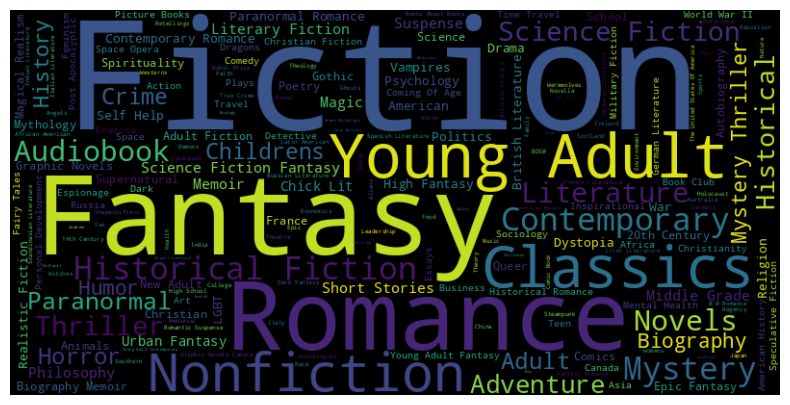

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(unique_genres)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


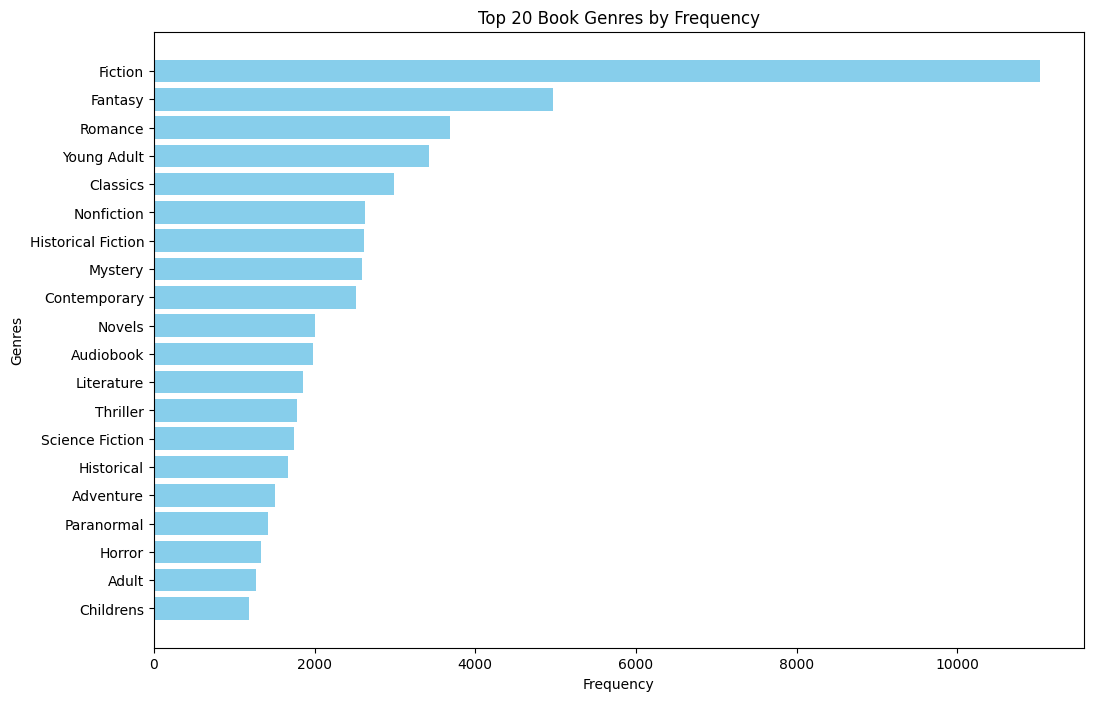

In [40]:
import matplotlib.pyplot as plt
# Sort the genres by frequency in descending order and get the top 20
sorted_genres = sorted(unique_genres.items(), key=lambda item: item[1], reverse=True)
top_genres = dict(sorted_genres[:20])

# Extracting the keys and values for the top 20 genres
genres = list(top_genres.keys())
frequencies = list(top_genres.values())

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.barh(genres, frequencies, color='skyblue')
plt.gca().invert_yaxis()  

# Adding titles and labels
plt.title('Top 20 Book Genres by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Genres')

# Display the plot
plt.show()


In [41]:
cleaned_df_details

book_id                                    cover_image_uri  \
0       57094644  https://images-na.ssl-images-amazon.com/images...   
1         895185  https://images-na.ssl-images-amazon.com/images...   
2        2948832  https://images-na.ssl-images-amazon.com/images...   
3         154126  https://images-na.ssl-images-amazon.com/images...   
4         298663  https://images-na.ssl-images-amazon.com/images...   
...          ...                                                ...   
15566  183057601  https://images-na.ssl-images-amazon.com/images...   
15567     337100  https://images-na.ssl-images-amazon.com/images...   
15568       9817  https://images-na.ssl-images-amazon.com/images...   
15569   32940867  https://images-na.ssl-images-amazon.com/images...   
15570       9533  https://images-na.ssl-images-amazon.com/images...   

                   book_title  \
0        Daughter of the Deep   
1                   The Ghost   
2        Seduce Me at Sunrise   
3      The Discovery of India   
4        The Killer Inside Me   
...                       ...   
15566                    Ours   
15567  The Runes of the Earth   
15568   Ten Days in the Hills   
15569             The Chemist   
15570          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                                     format  \
0                  ['352 pages, Hardcover']   
1                  ['384 pages, Hardcover']   
2      ['360 pages, Mass Market Paperback']   
3                  ['656 pages, Paperback']   
4                  ['244 pages, Paperback']   
...                                     ...   
15566                             ['ebook']   
15567              ['533 pages, Hardcover']   
15568              ['450 pages, Hardcover']   
15569              ['521 pages, Paperback']   
15570              ['367 pages, Hardcover']   

                             publication_info  \
0         ['First published January 1, 2021']   
1        ['First published October 23, 2007']   
2      ['First published September 30, 2008']   
3         ['First published January 1, 1946']   
4          ['First published March 13, 1952']   
...                                       ...   
15566             ['Published July 23, 2023']   
15567     ['First published October 1, 2004']   
15568     ['First published January 1, 2007']   
15569    ['First published November 8, 2016']   
15570     ['First published January 1, 2006']   

                                              authorlink  \
0      https://www.goodreads.com/author/show/15872.Ri...   
1      https://www.goodreads.com/author/show/575.Robe...   
2      https://www.goodreads.com/author/show/27847.Li...   
3      https://www.goodreads.com/author/show/89095.Ja...   
4      https://www.goodreads.com/author/show/7621.Jim...   
...                                                  ...   
15566  https://www.goodreads.com/author/show/21293689...   
15567  https://www.goodreads.com/author/show/12980.St...   
15568  https://www.goodreads.com/author/show/1339.Jan...   
15569  https://www.goodreads.com/author/show/941441.S...   
15570  https://www.goodreads.com/author/show/6247.Mat...   

                     author num_pages  \
0              Rick Riordan   ['352']   
1           Robert   Harris   ['384']   
2              Lisa Kleypas   ['360']   

In [42]:
def clean_num_pages(column):
    return column.replace('[','').replace(']','').replace("'",'')

In [43]:

cleaned_df_details['num_pages']=cleaned_df_details['num_pages'].apply(lambda x: clean_num_pages(x))

In [44]:
try:    
    cleaned_df_details['num_pages']=pd.to_numeric(cleaned_df_details['num_pages'])
except ValueError as e:
    print('Error will occur here as some of the books have no pages and are not none but "None" string')

Error will occur here as some of the books have no pages and are not none but "None" string


In [45]:
cleaned_df_details[cleaned_df_details['num_pages'].values=='None']
cleaned_df_details['num_pages'].replace('None',np.nan,inplace=True)
#We will check what we want to impute after doing distribution analysis

/tmp/ipykernel_15576/3388692136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df_details['num_pages'].replace('None',np.nan,inplace=True)


In [46]:
cleaned_df_details['num_pages']=pd.to_numeric(cleaned_df_details['num_pages'])

In [47]:
cleaned_df_details.describe().map(lambda x: f"{x:0.3f}")
# avg rating's,num_pages mean and median are almost the same so thats good, lets plot some graphs to visualize better


book_id  num_pages   num_ratings num_reviews average_rating
count      15571.000  15320.000     15571.000   15571.000      15571.000
mean    10307398.263    362.422     85909.650    5222.439          4.000
std     21386076.156    255.127    312336.527   15909.740          0.331
min            1.000      1.000         0.000       0.000          0.000
25%        93135.000    243.000      3131.000     214.000          3.830
50%       880192.000    329.000     16709.000    1014.000          4.030
75%     11091720.000    424.000     56693.500    3504.500          4.210
max    209607645.000   8258.000  10116247.000  274695.000          5.000

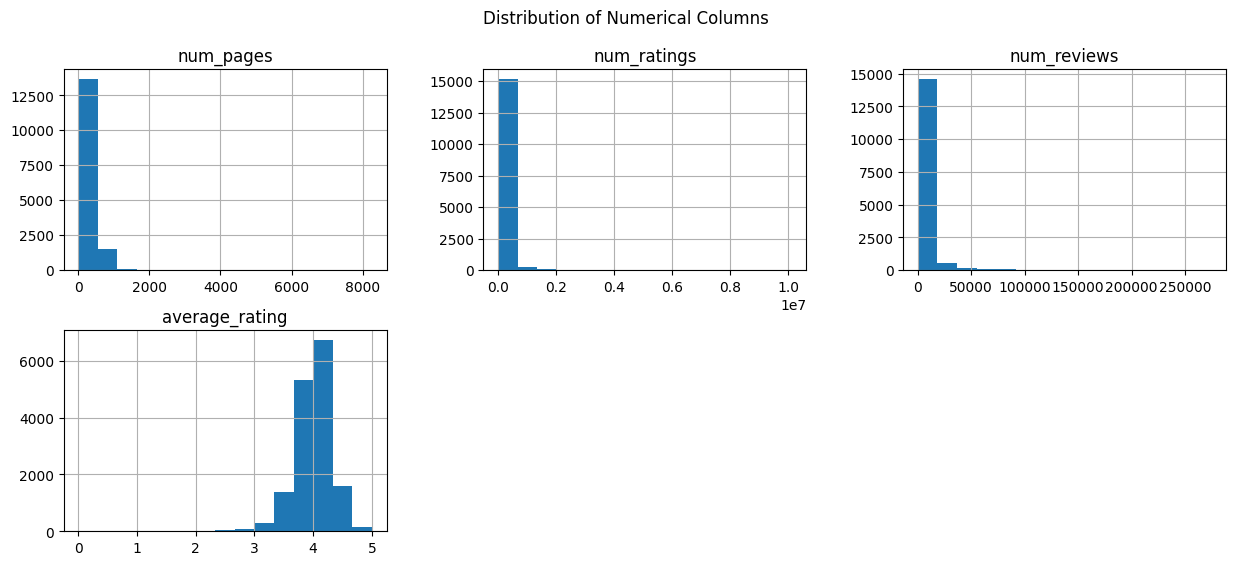

In [48]:

numeric_df = cleaned_df_details.select_dtypes(include=[np.number])
numeric_df.drop('book_id',axis=1,inplace=True)
# Check distribution with histograms
numeric_df.hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

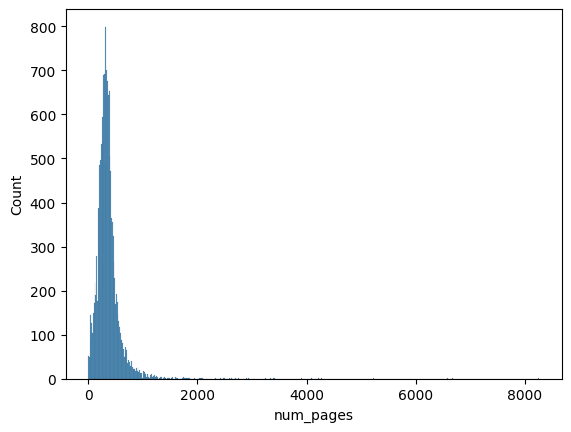

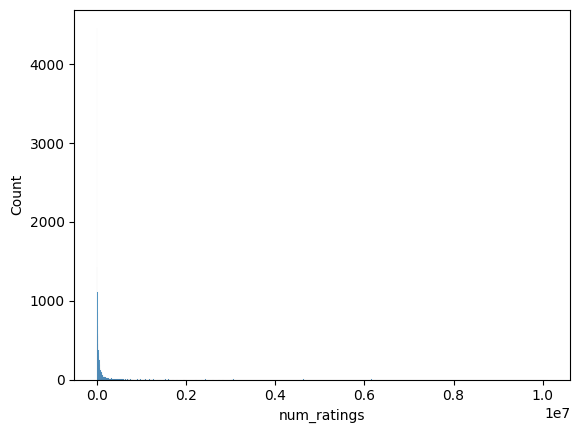

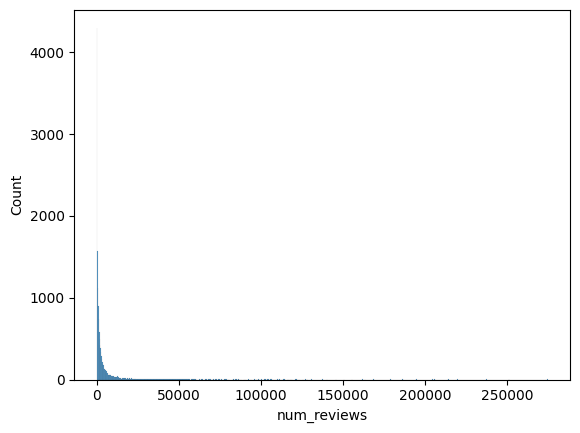

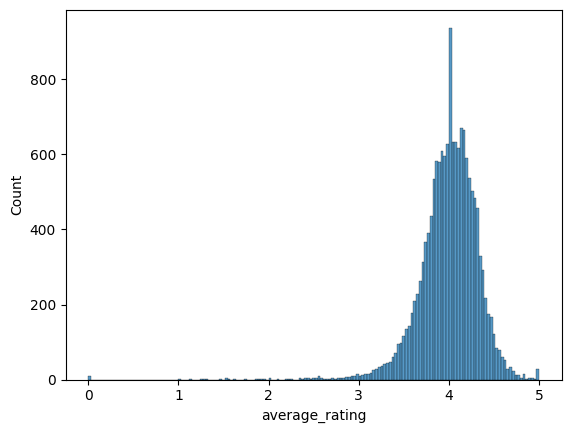

In [49]:
#Kde
for col in numeric_df.columns:
    sns.histplot(numeric_df[col])
    plt.show()


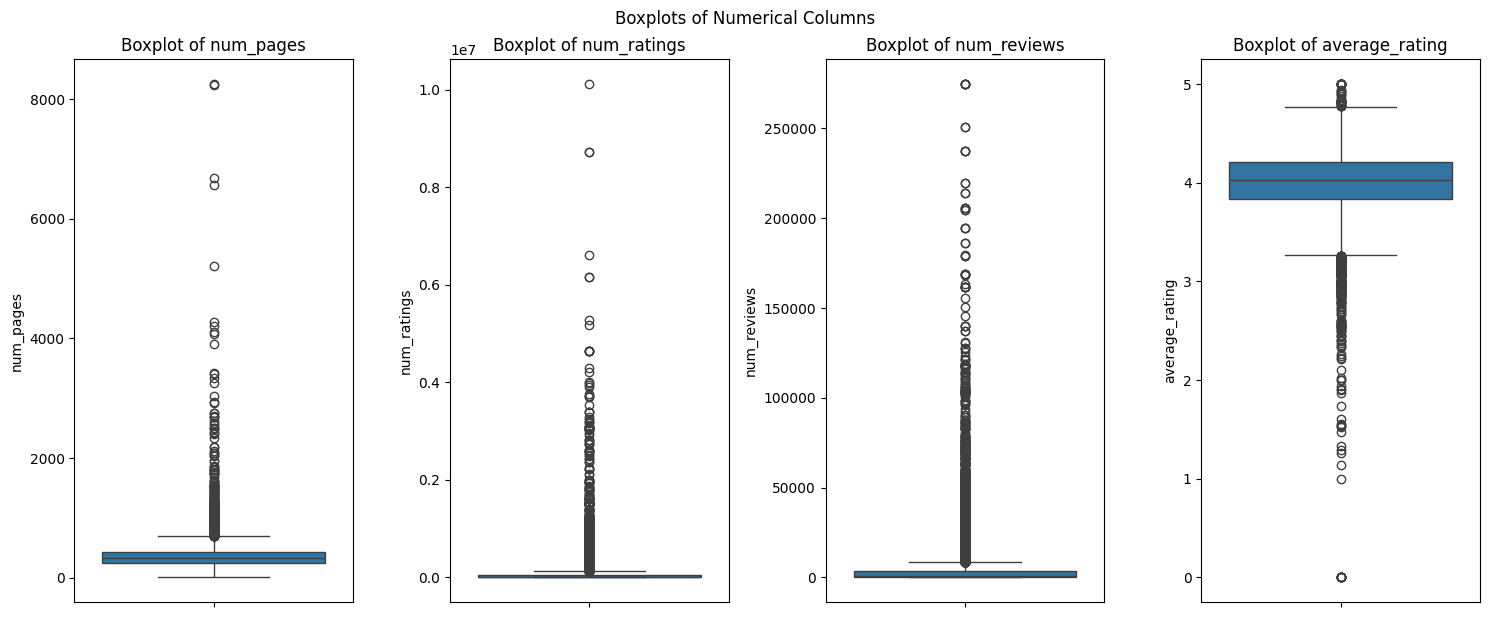

In [50]:
# Step 3: Visualize outliers with boxplots
plt.figure(figsize=(15, 6))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(1, len(numeric_df.columns), i)
    sns.boxplot(y=numeric_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', y=1.02)
plt.show()

In [51]:
cleaned_df_details['num_pages']

0        352.0
1        384.0
2        360.0
3        656.0
4        244.0
         ...  
15566      NaN
15567    533.0
15568    450.0
15569    521.0
15570    367.0
Name: num_pages, Length: 15571, dtype: float64

In [52]:
df=cleaned_df_details.copy()

In [53]:
%autoreload 2

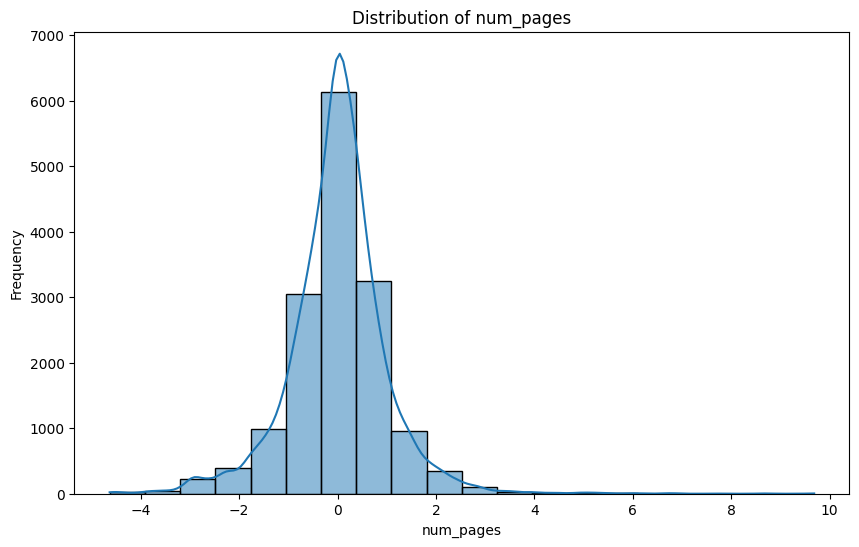

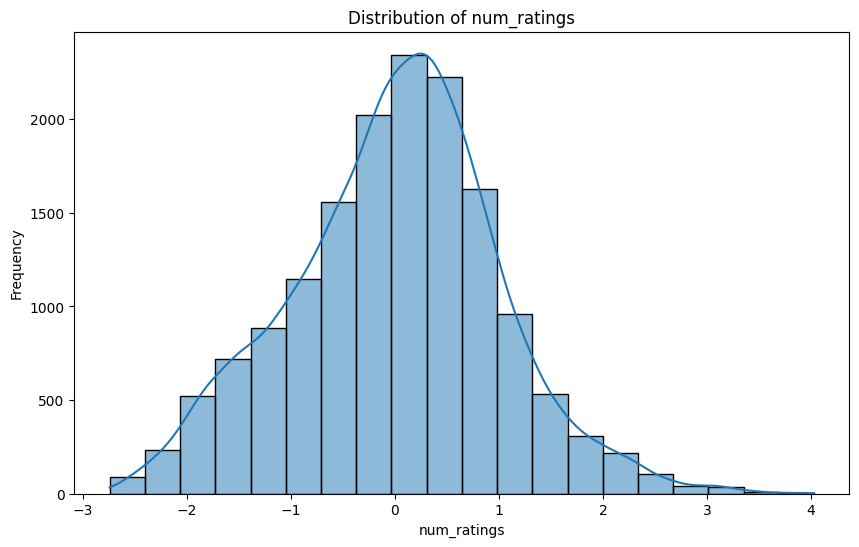

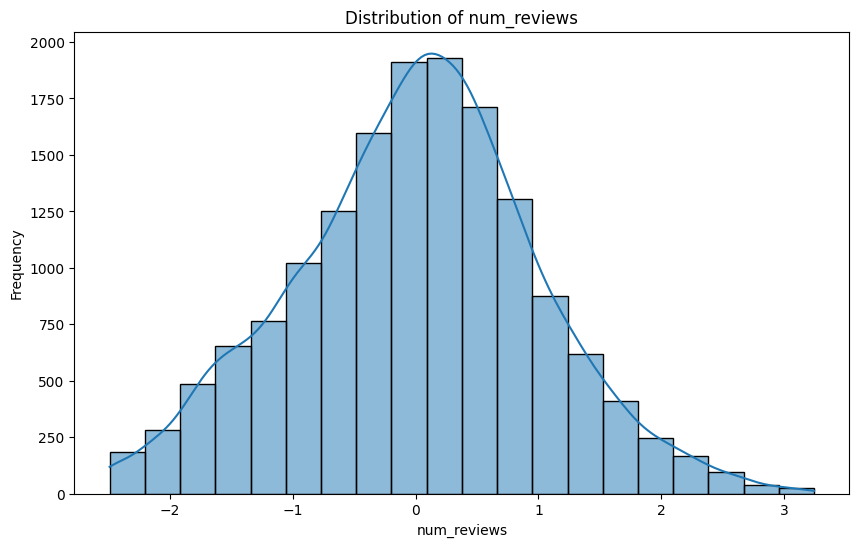

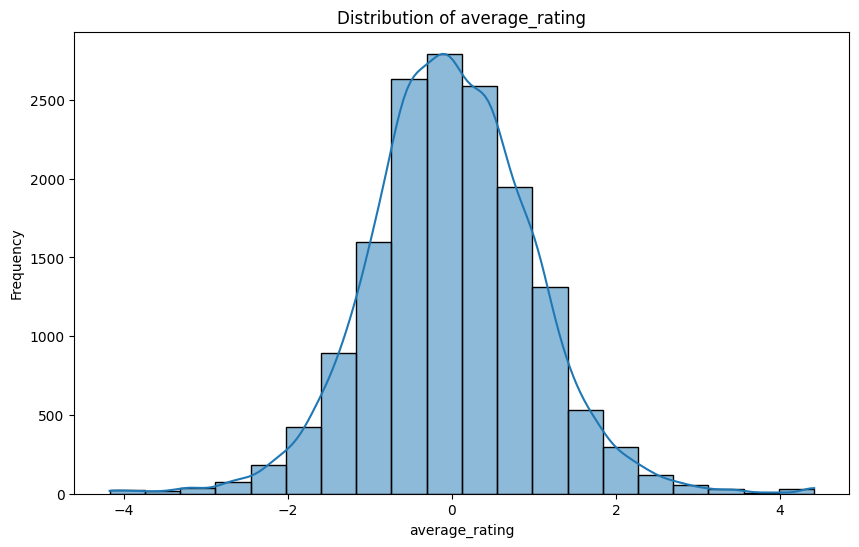

In [54]:
from cleaning_methods import preprocessing_data
l_preprocess=['num_pages', 'num_ratings', 'num_reviews','average_rating']
preprocess=preprocessing_data()
preprocess.missing_values_impute(df,l_preprocess)
# preprocess.log_transformation(df,l_preprocess)
preprocess.boxcox_transformation(df,l_preprocess)
preprocess.remove_outliers(df,l_preprocess)
preprocess.standard_scalar(df,l_preprocess)
preprocess.plot_histograms(df,l_preprocess)


In [55]:
df.drop(['cover_image_uri','authorlink'],axis=1,inplace=True)

In [56]:
import ast
def cleaning_rating_distribution(df):
    df['rating_distribution']=df['rating_distribution'].apply(lambda x: ast.literal_eval(x))
    df['rating_distribution'] = df['rating_distribution'].apply(lambda x: {k: int(v.replace(',', '')) for k, v in x.items()})
    rating_distribution=df['rating_distribution'].apply(pd.Series)
    df=df.drop(['rating_distribution'],axis=1).join(rating_distribution)
    return df


In [57]:
df=cleaning_rating_distribution(df)

In [58]:
df

book_id              book_title  \
0       57094644    Daughter of the Deep   
1         895185               The Ghost   
2        2948832    Seduce Me at Sunrise   
3         154126  The Discovery of India   
4         298663    The Killer Inside Me   
...          ...                     ...   
15566  183057601                    Ours   
15567     337100  The Runes of the Earth   
15568       9817   Ten Days in the Hills   
15569   32940867             The Chemist   
15570       9533          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                                     format  \
0                  ['352 pages, Hardcover']   
1                  ['384 pages, Hardcover']   
2      ['360 pages, Mass Market Paperback']   
3                  ['656 pages, Paperback']   
4                  ['244 pages, Paperback']   
...                                     ...   
15566                             ['ebook']   
15567              ['533 pages, Hardcover']   
15568              ['450 pages, Hardcover']   
15569              ['521 pages, Paperback']   
15570              ['367 pages, Hardcover']   

                             publication_info                author  \
0         ['First published January 1, 2021']          Rick Riordan   
1        ['First published October 23, 2007']       Robert   Harris   
2      ['First published September 30, 2008']          Lisa Kleypas   
3         ['First published January 1, 1946']      Jawaharlal Nehru   
4          ['First published March 13, 1952']          Jim Thompson   
...                                       ...                   ...   
15566             ['Published July 23, 2023']         Julie Mannino   
15567     ['First published October 1, 2004']  Stephen R. Donaldson   
15568     ['First published January 1, 2007']           Jane Smiley   
15569    ['First published November 8, 2016']       Stephenie Meyer   
15570     ['First published January 1, 2006']         Matthew Pearl   

       num_pages                                             genres  \
0       0.144748  [Fantasy, Middle Grade, Young Adult, Science F...   
1       0.304597  [Fiction, Thriller, Mystery, Crime, Politics, ...   
2       0.185632  [Historical Romance, Romance, Historical, Hist...   
3       1.386309  [History, India, Nonfiction, Politics, Indian ...   
4      -0.484222  [Fiction, Crime, Mystery, Noir, Thriller, Horr...   
...          ...                                                ...   
15566   0.023473  [BDSM, Romance, M M Romance, Fantasy, Dark Fan...   
15567   0.946065  [Fantasy, Fiction, Epic Fantasy, Science Ficti...   
15568   0.606985  [Fiction, Contemporary, Romance, Literature, U...   
15569   0.899438  [Fiction, Thriller, Mystery, Romance, Audioboo...   
15570   0.220888  [Historical Fiction, Mystery, Fiction, Histori...   

       num_ratings  num_reviews  average_rating      5      4      3     2  \
0         0.254560     0.689025        0.680305  11539   9529   3834   717   
1         0.085572     0.237198       -0.762375   3868   7680   5125   983   
2         0.511851     0.524474        0.063872  15995  17187   8895  1763   
3        -0.250787    -0.348547        0.168100   3372   2920   1347   351   
4         0.207299     0.294163       -0.553099   6823   9036   5341  1556   
...            ...  

In [59]:
def format_cleaning(df,col_name):
    a=df[col_name].apply(lambda x: ast.literal_eval(x))
    a=a.apply(lambda x: x[0].split(',')[1] if isinstance(x, list) and len(x) > 0 and len(x[0].split(',')) > 1 else x)
    a=a.apply(lambda x: str(x).strip('[]')).apply(lambda x: x.strip("'")).apply(lambda x: x.strip())

    check=['Paperback', 'Hardcover', 'Mass Market Paperback', 'Kindle Edition', 'ebook']
    a=a.apply(lambda x: x if x in check else 'Others')
    df[col_name]=a


In [60]:
format_cleaning(df,'format')

In [61]:
df

book_id              book_title  \
0       57094644    Daughter of the Deep   
1         895185               The Ghost   
2        2948832    Seduce Me at Sunrise   
3         154126  The Discovery of India   
4         298663    The Killer Inside Me   
...          ...                     ...   
15566  183057601                    Ours   
15567     337100  The Runes of the Earth   
15568       9817   Ten Days in the Hills   
15569   32940867             The Chemist   
15570       9533          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                      format                        publication_info  \
0                  Hardcover     ['First published January 1, 2021']   
1                  Hardcover    ['First published October 23, 2007']   
2      Mass Market Paperback  ['First published September 30, 2008']   
3                  Paperback     ['First published January 1, 1946']   
4                  Paperback      ['First published March 13, 1952']   
...                      ...                                     ...   
15566                  ebook             ['Published July 23, 2023']   
15567              Hardcover     ['First published October 1, 2004']   
15568              Hardcover     ['First published January 1, 2007']   
15569              Paperback    ['First published November 8, 2016']   
15570              Hardcover     ['First published January 1, 2006']   

                     author  num_pages  \
0              Rick Riordan   0.144748   
1           Robert   Harris   0.304597   
2              Lisa Kleypas   0.185632   
3          Jawaharlal Nehru   1.386309   
4              Jim Thompson  -0.484222   
...                     ...        ...   
15566         Julie Mannino   0.023473   
15567  Stephen R. Donaldson   0.946065   
15568           Jane Smiley   0.606985   
15569       Stephenie Meyer   0.899438   
15570         Matthew Pearl   0.220888   

                                                  genres  num_ratings  \
0      [Fantasy, Middle Grade, Young Adult, Science F...     0.254560   
1      [Fiction, Thriller, Mystery, Crime, Politics, ...     0.085572   
2      [Historical Romance, Romance, Historical, Hist...     0.511851   
3      [History, India, Nonfiction, Politics, Indian ...    -0.250787   
4      [Fiction, Crime, Mystery, Noir, Thriller, Horr...     0.207299   
...                                                  ...          ...   
15566  [BDSM, Romance, M M Romance, Fantasy, Dark Fan...    -2.048186   
15567  [Fantasy, Fiction, Epic Fantasy, Science Ficti...    -0.298514   
15568  [Fiction, Contemporary, Romance, Literature, U...    -0.853062   
15569  [Fiction, Thriller, Mystery, Romance, Audioboo...     0.890139   
15570  [Historical Fiction, Mystery, Fiction, Histori...    -0.193151   

       num_reviews  average_rating      5      4      3     2     1  
0         0.689025        0.680305  11539   9529   3834   717   204  
1         0.237198       -0.762375   3868   7680   5125   983   190  
2         0.524474        0.063872  15995  17187   8895  1763   388  
3        -0.348547        0.168100   3372   2920   1347   351   209  
4         0.294163       -0.553099   6823   9036   5341  1556   563  
...            ...             ...    ...    ...    ...   ...   ...  
15566    -1.953341    

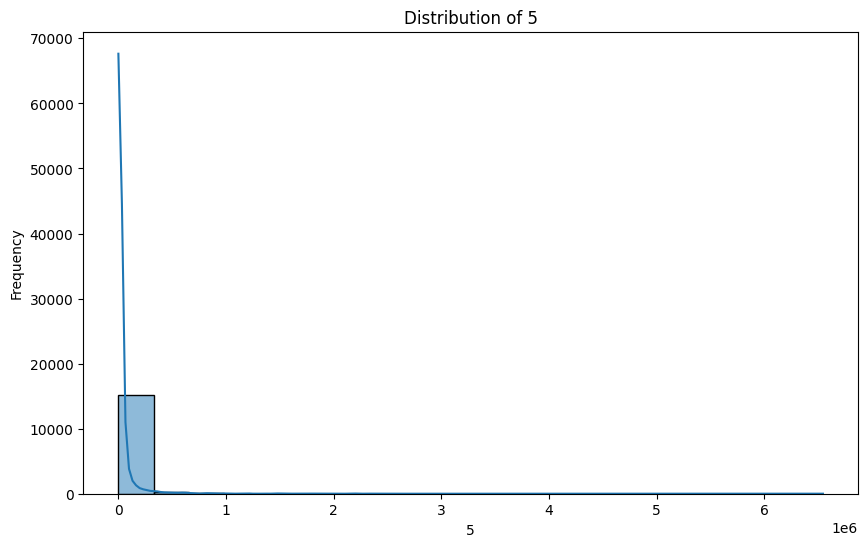

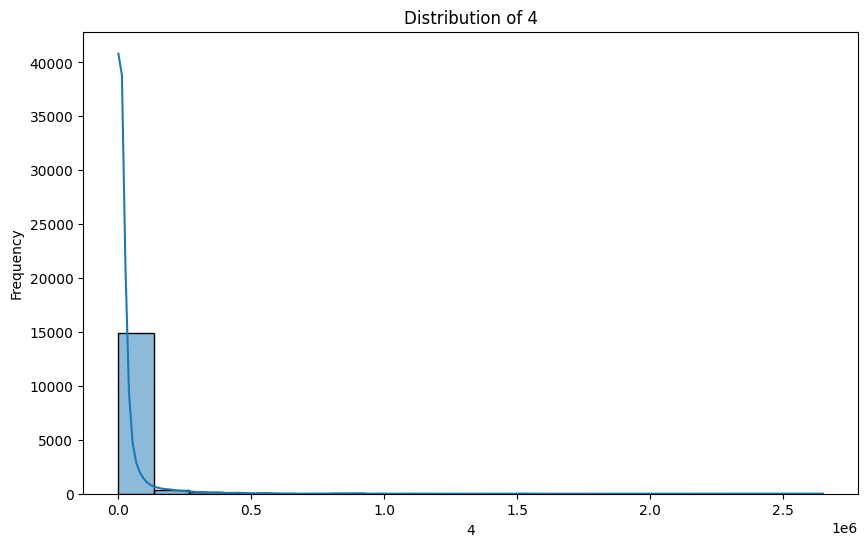

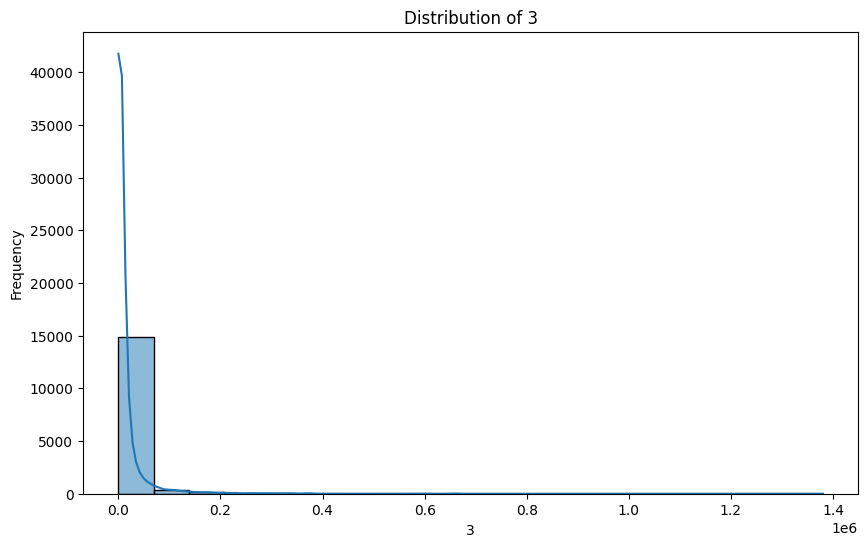

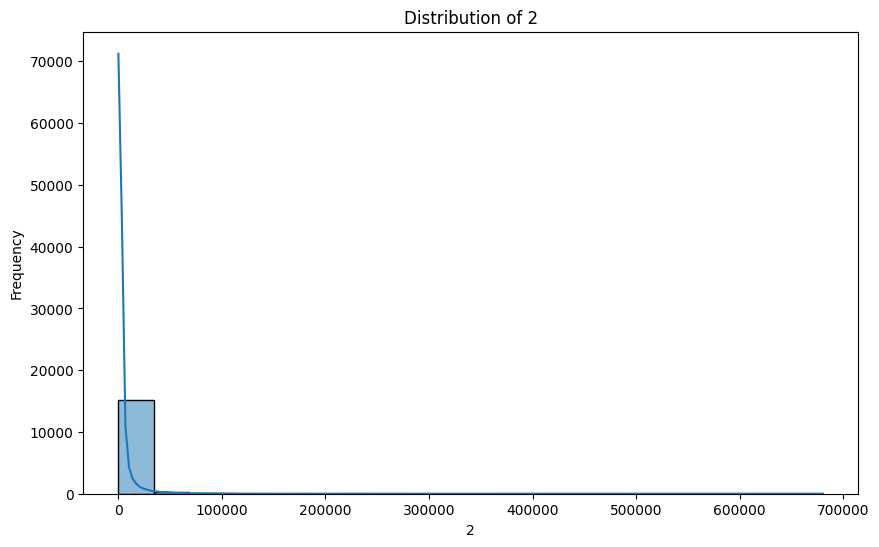

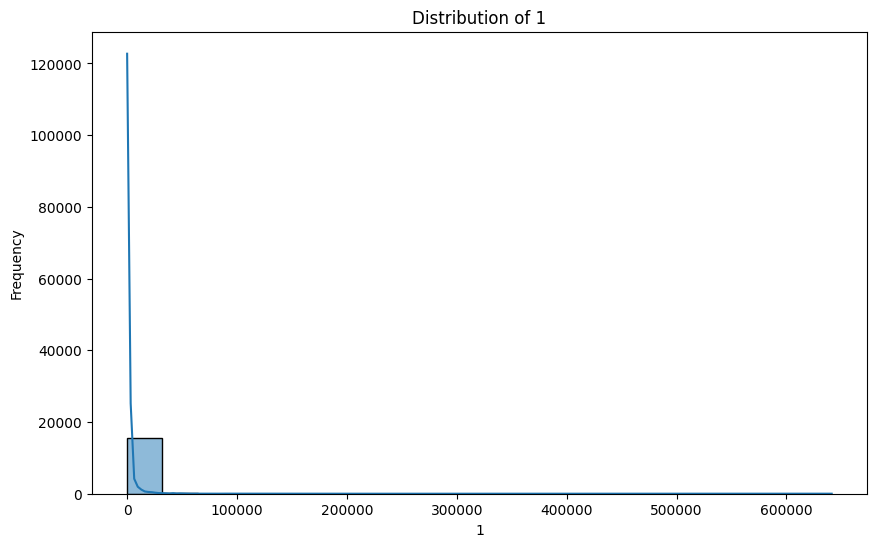

In [62]:
a = ['5', '4', '3','2','1']
preprocess.plot_histograms(df,a)


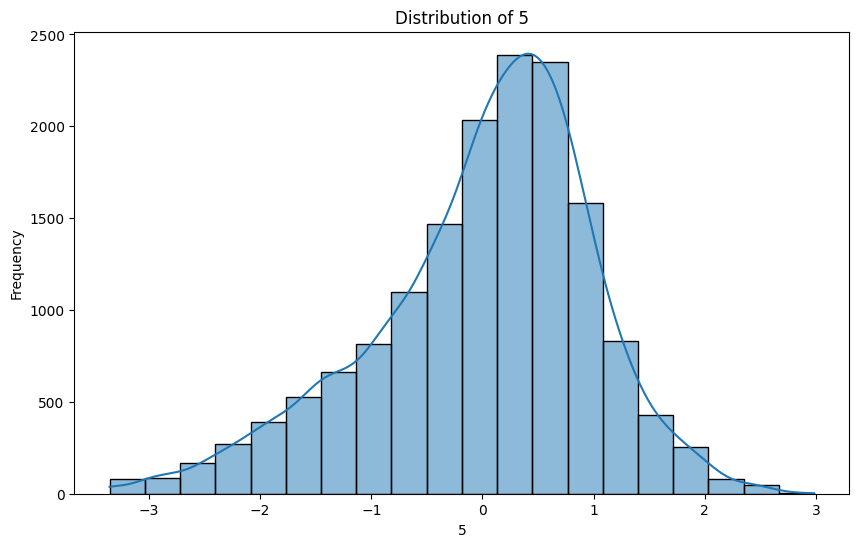

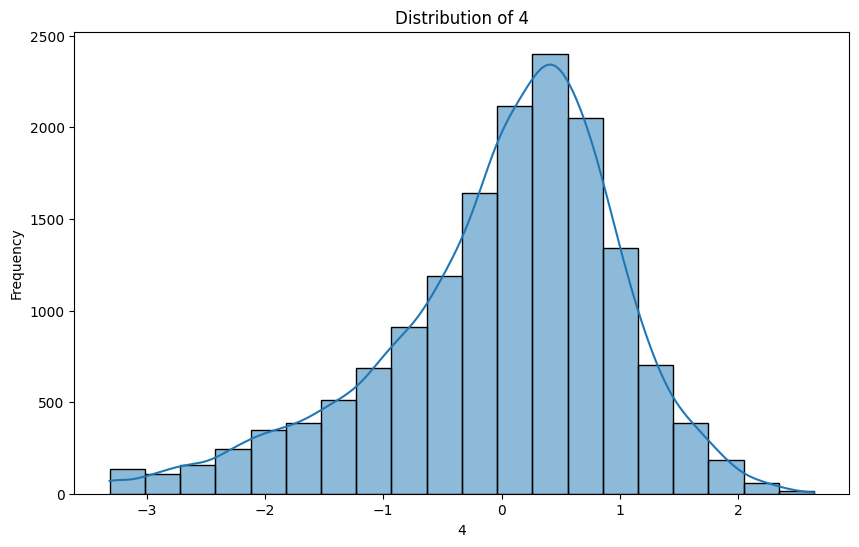

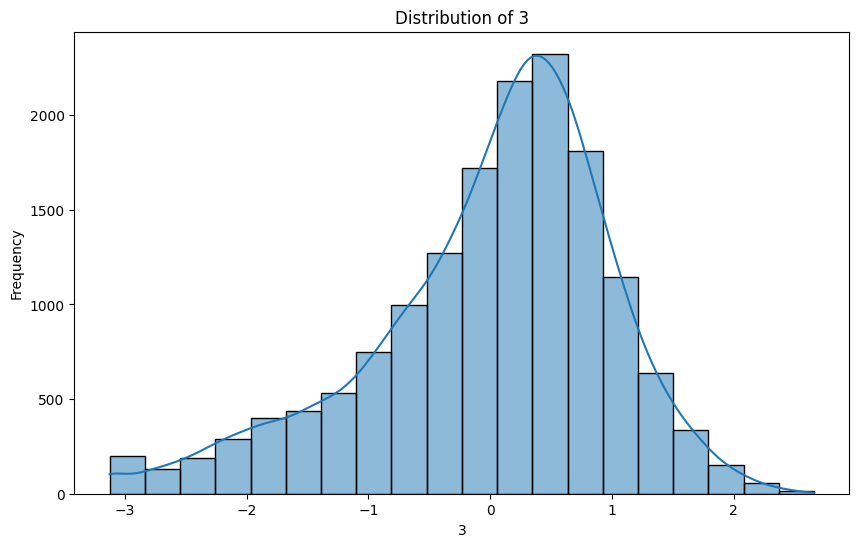

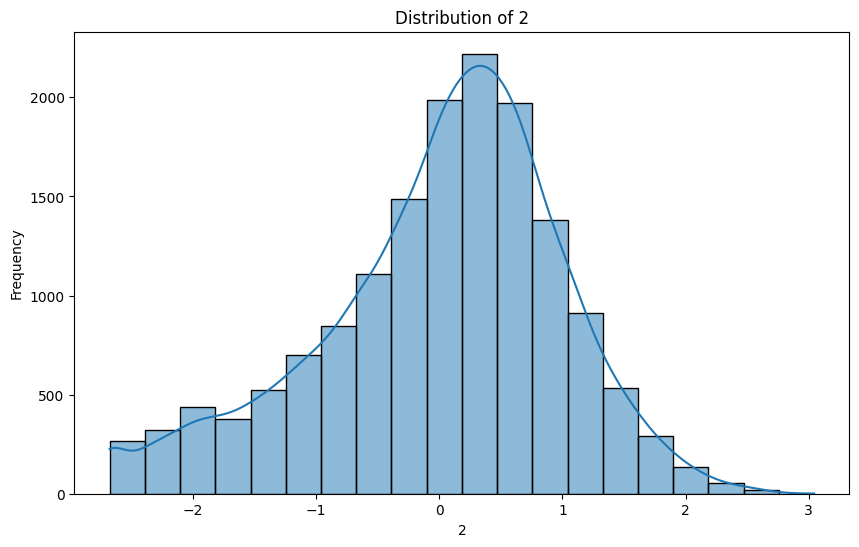

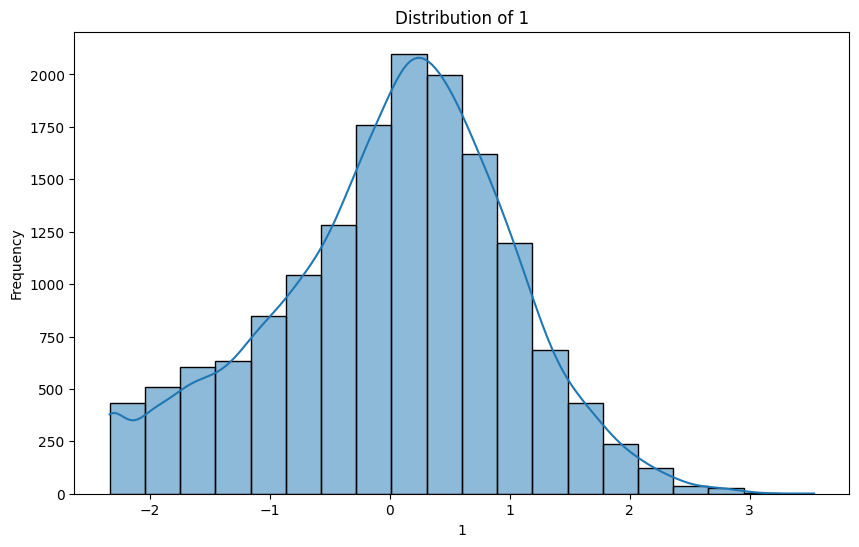

In [63]:
# a = ['5', '4', '3','2','1'] rating preprocessing
preprocess.log_transformation(df,a)
# preprocess.boxcox_transformation(df,a)
# preprocess.plot_histograms(df,a)
preprocess.remove_outliers(df,a)
preprocess.standard_scalar(df,a)
preprocess.plot_histograms(df,a)

In [64]:
df.publication_info.value_counts().tail(20)

publication_info
['First published January 1, 1170']       1
['First published January 10, 2011']      1
['Published June 29, 2017']               1
['First published January 2, 1956']       1
['First published March 5, 2002']         1
['First published January 27, 2011']      1
['First published July 11, 2019']         1
['First published April 3, 1991']         1
['First published March 18, 2021']        1
['First published June 1, 1844']          1
['First published December 24, 2007']     1
['First published December 28, 1996']     1
['First published May 13, 2010']          1
['First published August 1, 1970']        1
['First published September 28, 2006']    1
['First published January 1, 1010']       1
['First published May 15, 1996']          1
['First published June 11, 2008']         1
['First published July 10, 2005']         1
['Published July 23, 2023']               1
Name: count, dtype: int64

In [65]:
from datetime import datetime
df['publication_date']=df['publication_info'].str.extract(r'(\w+ \d{1,2}, \d{4})')




In [66]:
df['publication_date']

0           January 1, 2021
1          October 23, 2007
2        September 30, 2008
3           January 1, 1946
4            March 13, 1952
                ...        
15566         July 23, 2023
15567       October 1, 2004
15568       January 1, 2007
15569      November 8, 2016
15570       January 1, 2006
Name: publication_date, Length: 15571, dtype: object

In [67]:
df['publication_date'].isna().sum()
#54 values are null
#If we impute this, then this might create negative impact on our dataset
# df['publication_date'].apply(lambda x: x[0].split(',')[1].strip() if isinstance(x, list) else print(x))

54

In [68]:
df[df['publication_date'].isna()]
#So we searched a bit and found that these books have been published on another date/year but the author wanted to create a symbolic meaning behind the publish date of some of the books, so we decided to impute them with the median date
#  Convert publication date to datetime object
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%B %d, %Y',errors='coerce')

# Calculate the number of years since the first publication
#   Current date
# df['years_since_first_publication'] = (current_date - df['publication_date']).dt.days / 365


In [69]:
current_date = datetime(2024, 5, 20)
df.publication_date.max()


Timestamp('2025-04-01 00:00:00')

In [70]:
(df['publication_date'] > current_date).sum() #there is 1 book which have not been published yet(this time)


1

In [71]:
df[df['publication_date'] > current_date]#only 1 book
#i could probably try to recommend this book to the user, this will help us check how the cold start problem is affecting our model

book_id             book_title  \
3209  204426617  A Dagger of Lightning   

                                           book_details     format  \
3209  Let's get one thing straight, I am not your ch...  Hardcover   

                            publication_info             author  num_pages  \
3209  ['Expected publication April 1, 2025']  Meredith R. Lyons   0.023473   

     genres  num_ratings  num_reviews  average_rating         5         4  \
3209     []    -2.406242     -2.49164        4.417963 -2.630339 -3.312451   

             3         2         1 publication_date  
3209 -3.126069 -2.676819 -2.334253       2025-04-01

In [72]:
# df.loc[3209,'publication_date']=datetime(2024, 5, 10)

import pandas as pd
import numpy as np

# Assuming df is your DataFrame and current_date is the current date
current_date = pd.Timestamp.now()

# Clean the publication_date column to handle invalid dates
def clean_publication_date(date):
    try:
        return pd.Timestamp(date)
    except ValueError:
        return pd.NaT  # Return Not-a-Time for invalid dates

df['publication_date'] = df['publication_date'].apply(clean_publication_date)

In [73]:
df['years_since_first_publication'] = df.apply(lambda s: (current_date.to_pydatetime()-s['publication_date'].to_pydatetime()).days / 365.0 if not pd.isnull(s['publication_date']) else None,
    axis=1)

In [74]:
df

book_id              book_title  \
0       57094644    Daughter of the Deep   
1         895185               The Ghost   
2        2948832    Seduce Me at Sunrise   
3         154126  The Discovery of India   
4         298663    The Killer Inside Me   
...          ...                     ...   
15566  183057601                    Ours   
15567     337100  The Runes of the Earth   
15568       9817   Ten Days in the Hills   
15569   32940867             The Chemist   
15570       9533          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                      format                        publication_info  \
0                  Hardcover     ['First published January 1, 2021']   
1                  Hardcover    ['First published October 23, 2007']   
2      Mass Market Paperback  ['First published September 30, 2008']   
3                  Paperback     ['First published January 1, 1946']   
4                  Paperback      ['First published March 13, 1952']   
...                      ...                                     ...   
15566                  ebook             ['Published July 23, 2023']   
15567              Hardcover     ['First published October 1, 2004']   
15568              Hardcover     ['First published January 1, 2007']   
15569              Paperback    ['First published November 8, 2016']   
15570              Hardcover     ['First published January 1, 2006']   

                     author  num_pages  \
0              Rick Riordan   0.144748   
1           Robert   Harris   0.304597   
2              Lisa Kleypas   0.185632   
3          Jawaharlal Nehru   1.386309   
4              Jim Thompson  -0.484222   
...                     ...        ...   
15566         Julie Mannino   0.023473   
15567  Stephen R. Donaldson   0.946065   
15568           Jane Smiley   0.606985   
15569       Stephenie Meyer   0.899438   
15570         Matthew Pearl   0.220888   

                                                  genres  num_ratings  \
0      [Fantasy, Middle Grade, Young Adult, Science F...     0.254560   
1      [Fiction, Thriller, Mystery, Crime, Politics, ...     0.085572   
2      [Historical Romance, Romance, Historical, Hist...     0.511851   
3      [History, India, Nonfiction, Politics, Indian ...    -0.250787   
4      [Fiction, Crime, Mystery, Noir, Thriller, Horr...     0.207299   
...                                                  ...          ...   
15566  [BDSM, Romance, M M Romance, Fantasy, Dark Fan...    -2.048186   
15567  [Fantasy, Fiction, Epic Fantasy, Science Ficti...    -0.298514   
15568  [Fiction, Contemporary, Romance, Literature, U...    -0.853062   
15569  [Fiction, Thriller, Mystery, Romance, Audioboo...     0.890139   
15570  [Historical Fiction, Mystery, Fiction, Histori...    -0.193151   

       num_reviews  average_rating         5         4         3         2  \
0         0.689025        0.680305  0.423443  0.375877  0.251464  0.124733   
1         0.237198       -0.762375 -0.017886  0.289047  0.370226  0.258989   
2         0.524474        0.063872  0.555305  0.613293  0.595864  0.507648   
3        -0.348547        0.168100 -0.073290 -0.100157 -0.176481 -0.178933   
4         0.294163       -0.553099  0.211275  0.354494  0.387119  0.454474   
...            ...             ...       ...

In [75]:
df['years_since_first_publication'].describe()

count    15448.000000
mean        32.084574
std         33.381687
min         -0.852055
25%         13.626027
50%         20.302740
75%         38.421918
max        346.493151
Name: years_since_first_publication, dtype: float64

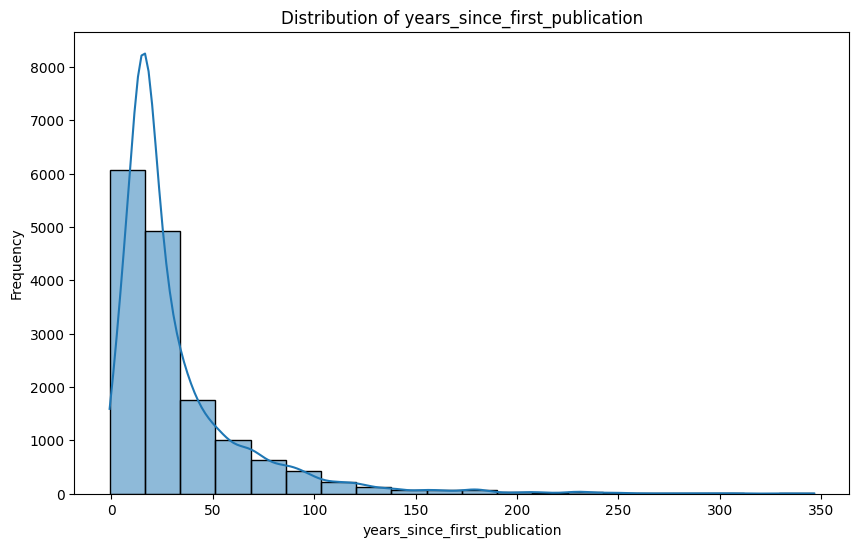

In [76]:
preprocess.plot_histograms(df,'years_since_first_publication')

In [77]:
# preprocess.missing_values_impute(df,'years_since_first_publication')
preprocess.log_transformation(df,'years_since_first_publication')
preprocess.remove_outliers(df,'years_since_first_publication')
preprocess.standard_scalar(df,'years_since_first_publication')

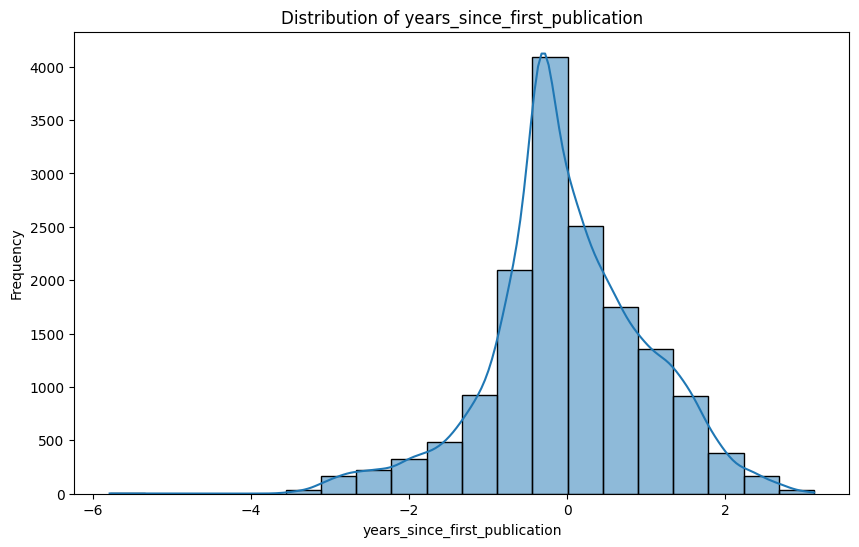

In [78]:
preprocess.plot_histograms(df,'years_since_first_publication')

In [79]:
df.drop('publication_info',axis=1,inplace=True)

In [80]:
df.drop('publication_date',axis=1,inplace=True)

In [81]:
for i in df.columns:
    print(i)
    print(df[i].isin(['']).sum())
    print()

book_id
0

book_title
0

book_details
3448

format
0

author
0

num_pages
0

genres
0

num_ratings
0

num_reviews
0

average_rating
0

5
0

4
0

3
0

2
0

1
0

years_since_first_publication
0



In [82]:
# def book_id_missing_details(df):
#     list_of_books_with_missing_details=df[df.book_details==''].book_id
#     list_of_books_with_missing_details.reset_index(drop=True,inplace=True)
#     list_of_books_with_missing_details=list(list_of_books_with_missing_details)
#     return list_of_books_with_missing_details

# book_reviews.groupby('book_id')['review_content']
# len(book_id_missing_details(df))
# book_reviews.book_id.nunique(),book_details.book_id.nunique()

# a=book_reviews['book_id'].astype('int64')
# len(set(a) ^ set(df.book_id))
# b=set(a) ^ set(df.book_id)


# #the books which are not there in common between db
# len(b)


# l=[]
# for i in b:
#     if i in book_id_missing_details(df):
#         continue
#     else:
#         l.append(i)
# len(l)


# book_ids_of_missing_details_list=book_id_missing_details(df)


# len(df[df.book_id.isin(book_ids_of_missing_details_list)])

# book_reviews['book_id']=book_reviews.book_id.astype('int')
# len(book_ids_of_missing_details_list)

# book_reviews[book_reviews.book_id.isin(book_ids_of_missing_details_list)]
# #Every book id has 4-5 reviews




# from cleaning_methods import preprocessing_data


# missing_details_book_id = {}
# for book_id, group in book_reviews.groupby('book_id'):
#     if book_id in book_ids_of_missing_details_list:
#         # print(f"Book ID: {book_id}")
#         if book_id not in missing_details_book_id:
#             missing_details_book_id[book_id] = []  # Create a new list for the book ID
#         for review_content in group['review_content']:
#             # print(type(review_content))
#             a=preprocessing_data.clean_text_bart(text=review_content)
#             missing_details_book_id[book_id].append(a)  # Append the review content to the list

# df


# import pretrained_bart
# generated_summary = pretrained_bart.bart_summarizer(missing_details_book_id)


# for k,v in generated_summary.items():
#     df.loc[k,'book_details']=v
# df.to_csv('book_details_bart.csv',index=False)

## Lets Try to filter out the Genres such that Genres in a same category are represented together, this will help us reduce the unique genres

Vectorizing the Genres using TF-IDF

#### Note:

I am not going to check for imbalance in the data nor i am going to transform or split the data, The reason being TF-IDF already takes care of the problem before sending it into K means, The imbalance is weighted down the the algorithm and transformation is not needed because of Sparse matrix it generates
The split would have been good but i already have a validation data separately so thats also not needed

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_df_details=df.copy()

cleaned_df_details['genres_str'] = cleaned_df_details['genres'].apply(lambda x: ' '.join(x))


# Vectorize the genres using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_df_details["genres_str"])

In [84]:
# Vectorize the genres using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_df_details["genres_str"])#

#Get the IDF scores for each genre
feature_names = vectorizer.get_feature_names_out()


idf_scores = vectorizer.idf_

idf_df = pd.DataFrame({'Genre': feature_names, 'IDF Score': idf_scores})
idf_df.sort_values(by='IDF Score')

Genre  IDF Score
238       fiction   1.314232
232       fantasy   2.109395
20          adult   2.163613
524       romance   2.419461
678         young   2.508841
..            ...        ...
184  discipleship   9.960083
309           hqn   9.960083
527      romanovs   9.960083
603         tarot   9.960083
237            fi   9.960083

[682 rows x 2 columns]

Hyper Parameter tuning for Kmeans

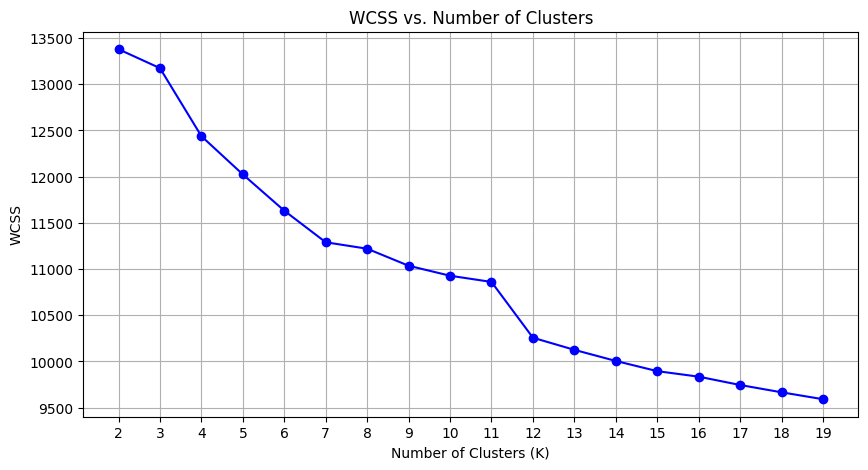

In [85]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and silhouette scores
wcss = []
silhouette_scores = []

# Define range of values for K
k_range = range(2, 20)

# Iterate over each value of K
for k in k_range:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    # Compute WCSS (within-cluster sum of squares)
    wcss.append(kmeans.inertia_)
    
    # Compute silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot WCSS vs. number of clusters (elbow method)
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()



## We would want the lowest WCSS and highest Silhouette
### As we can see from the graph 12 clusters might be the best representative of the genres

In [86]:

genres_df=cleaned_df_details.copy()
n_clusters=12
# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
genres_df['cluster'] = kmeans.fit_predict(X)

# Print the genres with their assigned clusters
genres_df.sort_values('cluster')


book_id                                         book_title  \
1593       2152                          The Jane Austen Book Club   
15306   1010942  Pokemon Chapter Book #03: Attack Of The Prehis...   
5515     356321                                 The Story of Babar   
10542    295662                Junie B. Jones Is a Graduation Girl   
14614    398544                         Night in the Haunted Tower   
...         ...                                                ...   
9301      40445                                     Altered Carbon   
9295   19155234                                         The Cellar   
5065     124509                             Smilla's Sense of Snow   
13284     86442                                       High Country   
15570      9533                                     The Poe Shadow   

                                            book_details  \
1593   The Extraordinary New York Times Bestseller  I...   
15306  Gotta read 'em all!Ash, Misty, Brock, and Pika...   
5515   The first of the tales starring the most famou...   
10542  It's kindergarten graduation!All the children ...   
14614  In order to defeat the Psychic Pokâemon of Gym...   
...                                                  ...   
9301   It's the twenty-fifth century, and advances in...   
9295                                                       
5065                                                       
13284  It's fall in the Sierra Mountains, and Anna Pi...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                      format             author  num_pages  \
1593               Paperback   Karen Joy Fowler  -0.208280   
15306              Paperback        Tracey West  -2.019155   
5515               Hardcover   Jean de Brunhoff  -2.564777   
10542              Paperback       Barbara Park  -2.138884   
14614              Paperback        Tracey West  -2.170241   
...                      ...                ...        ...   
9301   Mass Market Paperback  Richard K. Morgan   0.918956   
9295               Paperback    Natasha Preston   0.225886   
5065               Paperback         Peter Høeg   0.734230   
13284  Mass Market Paperback        Nevada Barr  -0.132436   
15570              Hardcover      Matthew Pearl   0.220888   

                                                  genres  num_ratings  \
1593   [Fiction, Chick Lit, Romance, Contemporary, Bo...     0.741690   
15306  [Fantasy, Childrens, Fiction, Novels, Adventur...    -1.069080   
5515   [Picture Books, Childrens, Fiction, Classics, ...     0.654118   
10542  [Childrens, Fiction, Chapter Books, Humor, Rea...    -0.338773   
14614  [Fiction, Childrens, Adventure, Fantasy, Chapt...    -1.222694   
...                                                  ...          ...   
9301   [Science Fiction, Fiction, Cyberpunk, Mystery,...     0.963711   
9295   [Thriller, Mystery, Young Adult, Fiction, Horr...     0.780649   
5065   [Fiction, Mystery, Crime, Thriller, Denmark, S...     0.565496   
13284  [Mystery, Fiction, Mystery Thriller, Thriller,...    -0.211301   
15570  [Historical Fiction, Mystery, Fiction, Histori...    -0.193151   

       num_reviews  average_rating         5         4         3         2  \
1593      0.825185       -2.372982  0.249366  0.590503  1.047152  1.398912   
15306    -1.486202        0.642278 -0.826043 -1.247363 -1.033720 -1.074561   
5515     -0.217526        0.168100  0.755724  0.594376  0.721327  0.718246   
10542    -0.571718        0.168100 -0.119139 -0.305015 -0.170154 -0.188727   
14614    -1.471723        0.418816 -1.037256 -1.409398 -1.205889 -1.213953   
...            ...             ...       ...       ...       ...       ...   
9301      1.006738        0.029553  0.912861  0.972291  0.913210  0.959492   
9295      1.046013       -0.429247  0.767955  0.753231  0.832600  1.001650   
5065      0.535466       -0.906175  0.456294  0.645810  0.730171  0.882342   
13284    -0.273761       -0.366136 -0.201088

## Testing the new added genre, Checking if they are added to the currect representative cluster

In [87]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances


def classify_new_book(book_genres):
    # Transform the genres into TF-IDF
    book_vector = vectorizer.transform([book_genres])
    
    # Predict the cluster
    cluster = kmeans.predict(book_vector)
    
    # Calculate distances to cluster centroids
    distances = cosine_distances(book_vector, kmeans.cluster_centers_)
    
    return cluster, distances

new_book_genres = ""
cluster, distances = classify_new_book(new_book_genres)

# If the distance to the closest cluster is above a certain threshold, classify as "new genre"
threshold = 0.9  # Adjust this threshold based on your data
if np.min(distances) > threshold:
    genre_classification = "new genre"
else:
    genre_classification = f"existing genre {cluster[0]}"
    
print(genre_classification)




new genre


In [88]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

# Assuming tfidf_vectorizer is your trained TF-IDF vectorizer and kmeans is your trained K-Means model

def classify_new_book(book_genres, threshold=0.5):
    # Transform the genres into TF-IDF
    book_vector = vectorizer.transform([book_genres])
    
    # Calculate distances to cluster centroids
    distances = cosine_distances(book_vector, kmeans.cluster_centers_).flatten()
    
    # Find the minimum distance
    min_distance = np.min(distances)
    
    # Determine the cluster and confidence
    if min_distance > threshold:
        return "new genre"
    else:
        cluster = np.argmin(distances)
        return f"existing genre {cluster}", min_distance

new_book_genres = "science fiction, space, adventure"
classification_result = classify_new_book(new_book_genres, threshold=0.5)

print(classification_result)


('existing genre 2', 0.49296133118928376)


In [262]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

# Assume X is your original dataset and genres_df contains the cluster information
# Reduce dimensionality to 3 components
pca = PCA(n_components=3)
components = pca.fit_transform(X.toarray())

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2", "PC3"])
pca_df['cluster'] = genres_df['cluster']

# Create an interactive 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='cluster', 
                    symbol='cluster', title='Genres Clustering Visualization in 3D')

# Show the plot
fig.show()


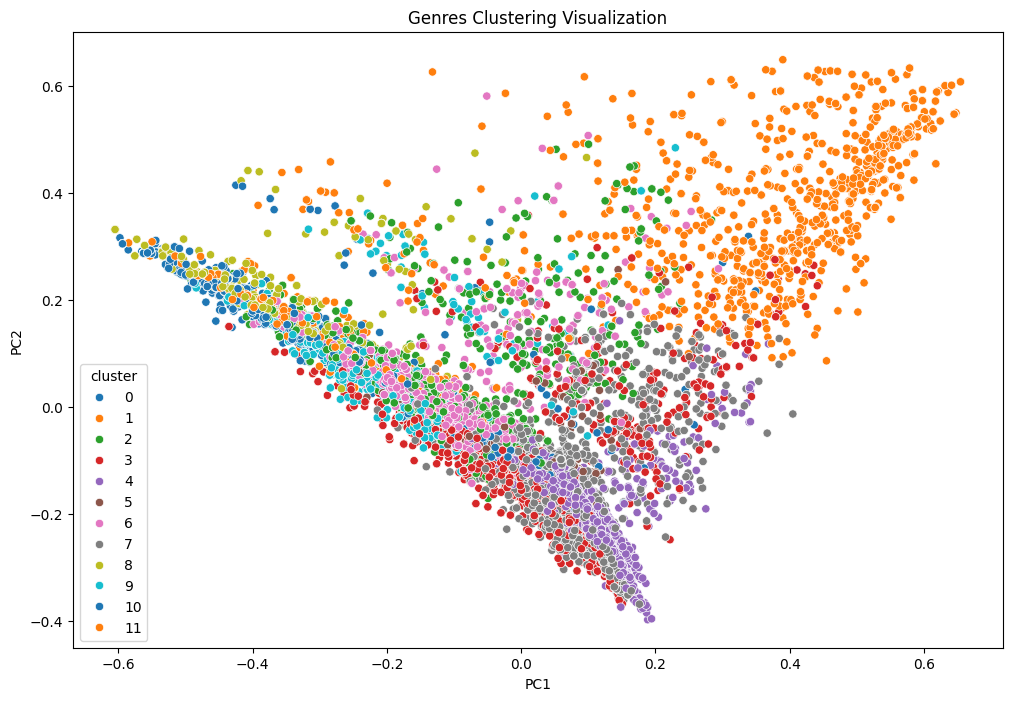

In [89]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization

pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())


pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2"])
pca_df['cluster'] = genres_df['cluster']


plt.figure(figsize=(12, 8))
markers = {0: "o", 1: "v", 2: "^", 3: "<", 4: ">", 5: "s", 6: "p", 7: "*", 8: "h", 9: "H", 10: "+", 11: "x"}


sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df, palette="tab10",markers=markers)
plt.title("Genres Clustering Visualization")
plt.show()


In [264]:
#Export to excel file to get an overview how this worked

In [90]:
import pandas as pd


output_file = 'Kmeans_cluster_genres.xlsx'
writer = pd.ExcelWriter(output_file)

# Iterate over each cluster
for cluster_id in range(12):  
    cluster_data = genres_df[genres_df['cluster'] == cluster_id]
    
    
    cluster_data_export = cluster_data.drop(columns=['cluster'])
    
    
    cluster_data_export.to_excel(writer, sheet_name=f'cluster_{cluster_id}', index=False)


writer.close()


### Now lets Find out the Unique values in each cluster and visualize it with a graph

In [91]:
genres_df['clusters']=genres_df['cluster']
genres_df.drop('cluster',axis=1,inplace=True)

In [92]:
import Interpreting_Clusters
# Create an instance of the Intereting_Clusters class
interpret_kmean = Interpreting_Clusters.Interpreting_Genre(n_clusters=12,top_k=15)
result=interpret_kmean.calculate_topk(genres_df=genres_df)
result

{0: [('Childrens', 240),
  ('Fiction', 237),
  ('Picture Books', 209),
  ('Fantasy', 122),
  ('Classics', 120),
  ('Animals', 95),
  ('Books About Books', 75),
  ('Humor', 75),
  ('Nonfiction', 51),
  ('Poetry', 49),
  ('Storytime', 29),
  ('Family', 25),
  ('Mystery', 24),
  ('History', 23),
  ('Kids', 23)],
 1: [('Paranormal', 534),
  ('Fantasy', 519),
  ('Romance', 393),
  ('Young Adult', 377),
  ('Fiction', 312),
  ('Paranormal Romance', 188),
  ('Supernatural', 169),
  ('Horror', 120),
  ('Magic', 105),
  ('Mystery', 102),
  ('Science Fiction', 79),
  ('Angels', 56),
  ('Thriller', 51),
  ('Ghosts', 50),
  ('Witches', 50)],
 2: [('Fiction', 1310),
  ('Science Fiction', 1253),
  ('Fantasy', 1028),
  ('Science Fiction Fantasy', 624),
  ('Dystopia', 416),
  ('Young Adult', 327),
  ('Audiobook', 306),
  ('Classics', 239),
  ('Horror', 238),
  ('Space Opera', 210),
  ('Adventure', 202),
  ('Novels', 183),
  ('Speculative Fiction', 178),
  ('Romance', 177),
  ('Post Apocalyptic', 161)],

In [268]:
interpret_kmean.plot_graph()

## Interpretation 

### Cluster 1 - "Children's and General Literature"
- **Children's Literature**: This includes genres like "Childrens," "Picture Books," and "Animals."
- **Fiction**: A broad category that can encompass many of the listed genres.
- **Fantasy**: A specific genre but often included in children's literature and broader fiction.
- **Classics**: Timeless books often read across age groups.
- **Humor**: Books meant to entertain and amuse, applicable to all age groups but often included in children's literature.
- **Nonfiction**: Informative books that can also appeal to younger audiences.
- **Poetry**: Verses that can be enjoyed by various age groups but also tailored for children.
- **Books About Books**: Meta-genre, often reflecting a love for literature itself.

### Cluster 2 - "Supernatural,Mystery and Romance"
- **Paranormal**: Genre involving supernatural phenomena, often with elements like ghosts, vampires, or werewolves.
- **Fantasy**: Genre featuring imaginative and fantastical elements, such as magic, mythical creatures, and epic quests.
- **Romance**: Genre focused on romantic relationships and love stories.
- **Young Adult**: Literature aimed at teenagers and young adults, often dealing with themes relevant to that age group.
- **Fiction**: A broad category that can encompass many different genres and themes.
- **Paranormal Romance**: Subgenre combining elements of paranormal and romance, often featuring supernatural love interests.
- **Supernatural**: Genre involving supernatural or paranormal elements beyond the natural world.
- **Horror**: Genre designed to evoke fear, dread, or disgust in the reader, often featuring elements like monsters, ghosts, or psychological terror.
- **Magic**: Genre focusing on the use of magical abilities or supernatural powers.
- **Mystery**: Genre centered around solving a puzzle or uncovering the truth behind a series of events or a crime.


### Cluster 3- "Science Fiction and Exploration"
- **Fiction**: A broad category encompassing various literary works, often characterized by imaginative storytelling and narrative depth.
- **Science Fiction**: Genre focusing on futuristic, speculative, or technological themes, exploring the impact of science and technology on society and humanity's future.
- **Fantasy**: Genre featuring imaginative and fantastical elements, such as magic, mythical creatures, and epic quests, set in fictional worlds.
- **Science Fiction Fantasy**: Subgenre blending elements of both science fiction and fantasy, often incorporating advanced technology alongside magical elements.
- **Dystopia**: Genre depicting societies characterized by oppression, suffering, and societal collapse, often serving as cautionary tales or critiques of contemporary issues.
- **Young Adult**: Literature aimed at teenagers and young adults, often dealing with themes relevant to that age group, including identity, relationships, and societal pressures.
- **Audiobook**: Format of presenting books in audio form, allowing readers to listen to narrated versions of literary works.
- **Classics**: Timeless literary works that have stood the test of time, often considered to be of high literary merit and cultural significance.
- **Horror**: Genre designed to evoke fear, dread, or disgust in the reader, often featuring elements like monsters, ghosts, or psychological terror.
- **Space Opera**: Subgenre of science fiction characterized by epic adventures set in space, featuring futuristic technology, interstellar travel, and grandiose storytelling.

### Cluster 4- "Historical Fiction"
- **Historical Fiction**: Genre focusing on stories set in the past, often blending historical facts with fictional elements to bring different eras to life.
- **Fiction**: A broad category encompassing various literary works, characterized by imaginative storytelling and narrative depth.
- **Historical**: Works that explore historical themes, events, and periods, providing insights into the past.
- **Romance**: Genre focused on romantic relationships and love stories, often with emotional and engaging narratives.
- **Fantasy**: Genre featuring imaginative and fantastical elements, such as magic, mythical creatures, and epic quests, set in fictional worlds.
- **Classics**: Timeless literary works that have stood the test of time, often considered to be of high literary merit and cultural significance.
- **War**: Genre depicting stories of conflict, battles, and the human experiences within wartime, offering perspectives on courage, sacrifice, and the impact of war.
- **Mystery**: Genre centered around solving a puzzle or uncovering the truth behind a series of events or a crime, engaging readers with suspense and intrigue.
- **Novels**: Long-form fictional works that explore a wide range of themes, characters, and narratives, often providing in-depth storytelling.
- **Audiobook**: Format of presenting books in audio form, allowing readers to listen to narrated versions of literary works.

### Cluster 5- "Non Fiction"
- **History**: Offers insights into past events, cultures, and civilizations, providing readers with a deeper understanding of historical contexts and developments.
- **Biography**: Chronicles the lives and achievements of individuals, offering readers personal narratives and insights into notable figures from various fields.
- **Memoir**: Presents personal accounts and reflections, allowing readers to delve into the experiences, challenges, and growth of individuals.
- **Philosophy**: Explores fundamental questions about existence, knowledge, ethics, and reality, encouraging readers to contemplate life's complexities and deepen their understanding of philosophical concepts.
- **Politics**: Examines governmental systems, policies, and societal dynamics, providing readers with insights into political structures, ideologies, and current affairs.
- **Psychology**: Explores human behavior, emotions, cognition, and mental processes, offering readers valuable insights into the complexities of the mind and behavior.
- **Self Help**: Provides guidance, strategies, and advice for personal development, empowerment, and improving various aspects of one's life.
- **Science**: Explores natural phenomena, discoveries, and scientific principles, offering readers a deeper understanding of the natural world and 
technological advancements.

### Cluster 6- "Graphic Novels and Comics"

- **Graphic Novels**: While often fictional, graphic novels can sometimes delve into real-life events or historical contexts, providing readers with visually engaging narratives that may intersect with nonfiction themes.

- **Comics**: Similar to graphic novels, comics predominantly feature fictional stories and characters. However, certain comics may touch upon real-world issues or historical events, offering readers a blend of entertainment and potential educational value.

- **Fiction**: Fictional works span various genres and narratives, offering readers imaginative storytelling experiences. While distinct from nonfiction, fiction can still provide insights into human experiences, emotions, and societal dynamics.

- **Fantasy**: Fantasy literature immerses readers in imaginative worlds filled with magic, mythical creatures, and epic quests. While inherently fictional, fantasy can explore themes of human nature, morality, and societal structures that may resonate with nonfiction themes.

- **Manga**: Originating from Japan, manga encompasses a wide range of genres, including fiction, fantasy, romance, and more. While primarily fictional, manga can sometimes incorporate elements of real-life culture, history, or social commentary.

- **Horror**: Horror fiction evokes fear, suspense, and unease through supernatural or psychological elements. While often purely fictional, horror stories may reflect societal fears, anxieties, or cultural phenomena that intersect with nonfiction themes.

- **Comic Book**: Comic books, like graphic novels, feature illustrated storytelling with a focus on fictional narratives and characters. While distinct from nonfiction, comic books can occasionally touch upon real-world issues or historical events.

- **Young Adult**: Young adult literature caters to adolescent readers and often features coming-of-age stories, romance, and adventure. While fictional, young adult books may address real-life challenges, relationships, and societal issues relevant to young readers.

- **Romance**: Romance novels center around romantic relationships and emotional connections between characters. While primarily fictional, romance stories may explore themes of love, identity, and personal growth that intersect with nonfiction themes.

### Cluster 7- "Adult/YA Fiction"

- **Contemporary**: This genre typically reflects modern life and society, often focusing on current issues, relationships, and cultural dynamics.

- **Romance**: Romance novels center around romantic relationships and emotional connections between characters, offering readers stories of love, passion, and personal growth.

- **Fiction**: Fictional works span various genres and narratives, offering readers imaginative storytelling experiences across different themes and settings.

- **Young Adult**: Young adult literature caters to adolescent readers and often features coming-of-age stories, relationships, and personal struggles relevant to young people.

- **Chick Lit**: Chick lit typically features light-hearted and humorous stories focused on the lives, relationships, and adventures of young women.

- **Adult**: This category encompasses fiction aimed at adult readers, covering a wide range of genres and themes suitable for mature audiences.

- **Contemporary Romance**: This subgenre combines elements of contemporary fiction with romantic themes, focusing on modern relationships and love stories set in present-day settings.

- **New Adult**: New adult literature targets readers in their late teens and early twenties, exploring themes of transition, identity, and relationships as young adults navigate the challenges of early adulthood.

- **Audiobook**: Audiobooks provide narrated versions of books, allowing readers to listen to stories and information rather than reading them in print or digital formats.

- **Realistic Fiction**: Realistic fiction portrays characters, settings, and events that could plausibly exist or occur in the real world, offering readers stories grounded in everyday life and experiences.


### Cluster 8- "Classic Fiction":

- **Classics**
- **Literature**
- **Novels**
- **Contemporary**
- **Literary Fiction**
- **Historical Fiction**
- **Short Stories**
- **Fantasy**
- **American**


### Cluster 9 - Urban Fantasy

- **Paranormal**
- **Fantasy**
- **Urban Fantasy**
- **Romance**
- **Vampires**
- **Paranormal Romance**
- **Fiction**
- **Young Adult**
- **Supernatural**
- **Magic**

## Cluster 10 - "Juvenile Fiction"(Generally catered towards Younger Audience)

- **Fiction**
- **Middle Grade**
- **Young Adult**
- **Childrens**
- **Fantasy**
- **Adventure**
- **Classics**
- **Historical Fiction**
- **Magic**
- **Mystery**


## Cluster 11 - "Fantasy"

- **Fantasy**
- **Fiction**
- **High Fantasy**
- **Magic**
- **Young Adult**
- **Epic Fantasy**
- **Romance**
- **Adventure**
- **Science Fiction Fantasy**
- **Young Adult Fantasy**
- **Audiobook**
- **Adult**
- **Dragons**
- **Fantasy Romance**
- **Dark Fantasy**

### Cluster 12 - "Thriller/Mystery"

- **Fiction**
- **Mystery**
- **Thriller**
- **Mystery Thriller**
- **Crime**
- **Suspense**
- **Audiobook**
- **Horror**
- **Detective**
- **Contemporary**
- **Adventure**
- **Action**
- **Romance**
- **Classics**
- **Espionage**



In [93]:
genre_interpretations = {
    0: "Children's and General Literature",
    1: "Supernatural, Mystery, and Romance",
    2: "Science Fiction and Exploration",
    3: "Historical Fiction",
    4: "Non Fiction",
    5: "Graphic Novels and Comics",
    6: "Adult/YA Fiction",
    7: "Classic Fiction",
    8: "Urban Fantasy",
    9: "Juvenile Fiction",
    10: "Fantasy",
    11: "Thriller/Mystery"
}

# Add a new column to the dataframe with the genre interpretation for each cluster
genres_df['Genre Interpretation'] = genres_df['clusters'].map(genre_interpretations)

# Display the updated dataframe
genres_df

book_id              book_title  \
0       57094644    Daughter of the Deep   
1         895185               The Ghost   
2        2948832    Seduce Me at Sunrise   
3         154126  The Discovery of India   
4         298663    The Killer Inside Me   
...          ...                     ...   
15566  183057601                    Ours   
15567     337100  The Runes of the Earth   
15568       9817   Ten Days in the Hills   
15569   32940867             The Chemist   
15570       9533          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                      format                author  num_pages  \
0                  Hardcover          Rick Riordan   0.144748   
1                  Hardcover       Robert   Harris   0.304597   
2      Mass Market Paperback          Lisa Kleypas   0.185632   
3                  Paperback      Jawaharlal Nehru   1.386309   
4                  Paperback          Jim Thompson  -0.484222   
...                      ...                   ...        ...   
15566                  ebook         Julie Mannino   0.023473   
15567              Hardcover  Stephen R. Donaldson   0.946065   
15568              Hardcover           Jane Smiley   0.606985   
15569              Paperback       Stephenie Meyer   0.899438   
15570              Hardcover         Matthew Pearl   0.220888   

                                                  genres  num_ratings  \
0      [Fantasy, Middle Grade, Young Adult, Science F...     0.254560   
1      [Fiction, Thriller, Mystery, Crime, Politics, ...     0.085572   
2      [Historical Romance, Romance, Historical, Hist...     0.511851   
3      [History, India, Nonfiction, Politics, Indian ...    -0.250787   
4      [Fiction, Crime, Mystery, Noir, Thriller, Horr...     0.207299   
...                                                  ...          ...   
15566  [BDSM, Romance, M M Romance, Fantasy, Dark Fan...    -2.048186   
15567  [Fantasy, Fiction, Epic Fantasy, Science Ficti...    -0.298514   
15568  [Fiction, Contemporary, Romance, Literature, U...    -0.853062   
15569  [Fiction, Thriller, Mystery, Romance, Audioboo...     0.890139   
15570  [Historical Fiction, Mystery, Fiction, Histori...    -0.193151   

       num_reviews  average_rating         5         4         3         2  \
0         0.689025        0.680305  0.423443  0.375877  0.251464  0.124733   
1         0.237198       -0.762375 -0.017886  0.289047  0.370226  0.258989   
2         0.524474        0.063872  0.555305  0.613293  0.595864  0.507648   
3        -0.348547        0.168100 -0.073290 -0.100157 -0.176481 -0.178933   
4         0.294163       -0.553099  0.211275  0.354494  0.387119  0.454474   
...            ...             ...       ...       ...       ...       ...   
15566    -1.953341       -0.204847 -2.234238 -2.870195 -2.183616 -2.208814   
15567    -0.463990       -0.762375 -0.269883 -0.148728 -0.034705 -0.002992   
15568    -0.404413       -3.167038 -1.494164 -1.061748 -0.557024 -0.096651   
15569     1.229197       -0.849215  0.737328  0.886439  0.991032  1.127764   
15570     0.035369       -2.165921 -0.463016 -0.152634  0.162127  0.506923   

              1  years_since_first_publication  \
0      0.003403                      -1.894448   
1     -0.027662                      -0.300537   
2      0.28471

In [94]:
genres_df.drop('genres_str',axis=1,inplace=True)

#### We used TF-IDF before doing K means, this helped us find out meaningful genres so that we can make a group of them using K means

**TF-IDF** gives more weight to words that are frequent within a document (TF) but relatively rare across the entire corpus (IDF). This means that TF-IDF assigns higher scores to words that are important for characterizing the content of a specific document while downweighting common words that appear frequently across many documents (e.g., stopwords).



In [271]:
genres_df.to_excel('Kmeans_cluster_genres.xlsx', index=False)

In [272]:
# Reset index of the DataFrame to integer numbers
genres_df.reset_index(drop=True, inplace=True)


In [99]:
df['Genre_Interpretation']=genres_df['Genre Interpretation']

In [101]:
df.to_csv('book_details_Pre_BART.csv',index=False)

## Checking for missing book details and imputing them with BART using reviews

In [40]:
df=pd.read_csv('book_details_Pre_BART.csv')
connection=sqlite3.connect('FINAL_DATA/DATASETS/book_reviews.db')
book_reviews=pd.read_sql_query("SELECT * FROM book_reviews", connection)

In [41]:
df

book_id              book_title  \
0       57094644    Daughter of the Deep   
1         895185               The Ghost   
2        2948832    Seduce Me at Sunrise   
3         154126  The Discovery of India   
4         298663    The Killer Inside Me   
...          ...                     ...   
15566  183057601                    Ours   
15567     337100  The Runes of the Earth   
15568       9817   Ten Days in the Hills   
15569   32940867             The Chemist   
15570       9533          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                      format                author  num_pages  \
0                  Hardcover          Rick Riordan   0.144748   
1                  Hardcover       Robert   Harris   0.304597   
2      Mass Market Paperback          Lisa Kleypas   0.185632   
3                  Paperback      Jawaharlal Nehru   1.386309   
4                  Paperback          Jim Thompson  -0.484222   
...                      ...                   ...        ...   
15566                  ebook         Julie Mannino   0.023473   
15567              Hardcover  Stephen R. Donaldson   0.946065   
15568              Hardcover           Jane Smiley   0.606985   
15569              Paperback       Stephenie Meyer   0.899438   
15570              Hardcover         Matthew Pearl   0.220888   

                                                  genres  num_ratings  \
0      ['Fantasy', 'Middle Grade', 'Young Adult', 'Sc...     0.254560   
1      ['Fiction', 'Thriller', 'Mystery', 'Crime', 'P...     0.085572   
2      ['Historical Romance', 'Romance', 'Historical'...     0.511851   
3      ['History', 'India', 'Nonfiction', 'Politics',...    -0.250787   
4      ['Fiction', 'Crime', 'Mystery', 'Noir', 'Thril...     0.207299   
...                                                  ...          ...   
15566  ['BDSM', 'Romance', 'M M Romance', 'Fantasy', ...    -2.048186   
15567  ['Fantasy', 'Fiction', 'Epic Fantasy', 'Scienc...    -0.298514   
15568  ['Fiction', 'Contemporary', 'Romance', 'Litera...    -0.853062   
15569  ['Fiction', 'Thriller', 'Mystery', 'Romance', ...     0.890139   
15570  ['Historical Fiction', 'Mystery', 'Fiction', '...    -0.193151   

       num_reviews  average_rating         5         4         3         2  \
0         0.689025        0.680305  0.423443  0.375877  0.251464  0.124733   
1         0.237198       -0.762375 -0.017886  0.289047  0.370226  0.258989   
2         0.524474        0.063872  0.555305  0.613293  0.595864  0.507648   
3        -0.348547        0.168100 -0.073290 -0.100157 -0.176481 -0.178933   
4         0.294163       -0.553099  0.211275  0.354494  0.387119  0.454474   
...            ...             ...       ...       ...       ...       ...   
15566    -1.953341       -0.204847 -2.234238 -2.870195 -2.183616 -2.208814   
15567    -0.463990       -0.762375 -0.269883 -0.148728 -0.034705 -0.002992   
15568    -0.404413       -3.167038 -1.494164 -1.061748 -0.557024 -0.096651   
15569     1.229197       -0.849215  0.737328  0.886439  0.991032  1.127764   
15570     0.035369       -2.165921 -0.463016 -0.152634  0.162127  0.506923   

              1  years_since_first_publication  \
0      0.003403                      -1.894448   
1     -0.027662                      -0.300537   
2      0.28471

In [12]:
def book_id_missing_details(df):
    list_of_books_with_missing_details=df[df.book_details.isna()].book_id
    list_of_books_with_missing_details.reset_index(drop=True,inplace=True)
    list_of_books_with_missing_details=list(list_of_books_with_missing_details)
    return list_of_books_with_missing_details



In [13]:
book_reviews.groupby('book_id')['review_content']


In [14]:
df[df.book_id.isin(book_id_missing_details(df))]

book_id                                         book_title  \
986      293101                              The Amityville Horror   
1194     174834                           The Cost of Discipleship   
1253   13346076                   Helping the Retarded to Know God   
1326   17563755                        Miscellaneous Stuff & Stuff   
1472    6921351                                        Ace Of Aces   
...         ...                                                ...   
14511   5167246                                      The Brainwave   
14785  59588437  Vincent Van Gogh Head Of A Skeleton With A Bur...   
15271   2278912           The Original Dr. Shade and Other Stories   
15389    656044                          Bill Cosby: Coming at You   
15491   3334967  Holocaust Denial: Antisemitism, Racism and the...   

      book_details                 format               author  num_pages  \
986            NaN  Mass Market Paperback            Jay Anson  -0.053272   
1194           NaN              Paperback  Dietrich Bonhoeffer  -0.025594   
1253           NaN              Hardcover            H.R. Hahn  -1.609722   
1326           NaN              Paperback            Jim Henry   0.023473   
1472           NaN              Hardcover           René Fonck  -1.091723   
...            ...                    ...                  ...        ...   
14511          NaN              Paperback        Evon Schuller  -1.466692   
14785          NaN              Paperback           Alan Wells   0.023473   
15271          NaN              Paperback           Kim Newman   0.139592   
15389          NaN              Hardcover       Sandra Ziegler  -2.939718   
15491          NaN              Paperback          Gill Seidel  -0.782199   

                                                  genres  num_ratings  \
986    ['Horror', 'Fiction', 'Paranormal', 'Thriller'...     1.073431   
1194   ['Christian', 'Theology', 'Christianity', 'Rel...     0.520669   
1253                               ['Religion', 'Humor']    -1.965937   
1326                                                ['']    -2.121641   
1472                        ['World War I', 'Biography']    -2.073389   
...                                                  ...          ...   
14511                                               ['']    -2.543908   
14785                                               ['']    -2.743855   
15271  ['Horror', 'Science Fiction', 'Collections', '...    -1.888908   
15389                                               ['']    -2.620216   
15491                                               ['']    -2.346307   

       num_reviews  average_rating         5         4         3         2  \
986       0.766751       -0.643940  0.954949  0.951314  1.150117  1.259551   
1194      0.271255        0.992738  0.721817  0.513463  0.364355  0.422968   
1253     -1.533266       -2.707822 -2.186672 -3.033418 -2.558656 -2.381541   
1326     -2.081339       -0.703539 -2.318092 -2.870195 -2.676405 -2.381541   
1472     -1.860218       -0.820456 -2.703968 -2.250074 -2.226740 -2.381541   
...            ...             ...       ...       ...       ...       ...   
14511    -2.491640       -4.085367 -3.353927 -3.312451 -3.126069 -2.676819   
14785    -2.491640       -4.175368 -3.353927 -3.312451 -3.126069 -2.676819   
15271    -2.081339        0.274250 -2.186672 -1.943268 -2.183616 -2.381541   
15389    -2.291637        4.417963 -3.074005 -3.312451 -3.126069 -2.676819   
15491    -2.169904       -2.004431 -2.910261 -3.033418 -2.676405 -2.381541   

              1  years_since_first_publication  \
986    1.214268                       0.845992   
1194   0.682803                       1.555029   
1253  -1.018646                       1.038512   
1326  -1.627451                      -0.702752   
1472  -2.334253                       1.078590   
...         ...                            ...   
14511 -1.851786                       0.445031   
14785 -2.334253             

In [15]:
len(book_id_missing_details(df))


3448

In [16]:
book_reviews.book_id.nunique(),df.book_id.nunique()

(15693, 15505)

In [17]:
#XOR to check the books which are not there in common
a=book_reviews['book_id'].astype('int64')
len(set(a) ^ set(df.book_id))
b=set(a) ^ set(df.book_id)



In [18]:
#the books which are not there in common between db
len(b)

678

In [19]:
#the books which are not there in common between db
l=[]
for i in b:
    if i in book_id_missing_details(df):
        continue
    else:
        l.append(i)
len(l)


645

In [20]:
book_ids_of_missing_details_list=book_id_missing_details(df)

In [21]:
book_ids_of_missing_details_list

[293101,
 174834,
 13346076,
 17563755,
 6921351,
 34002132,
 61987921,
 3454024,
 7510,
 13002545,
 412732,
 1596070,
 84151,
 1596770,
 6056726,
 17231,
 4837112,
 67,
 30241,
 56250307,
 1398034,
 2054,
 18404957,
 286957,
 41637836,
 201272400,
 24445517,
 140077,
 7619292,
 28194,
 49392,
 616828,
 325785,
 29581,
 61459992,
 32508,
 78129,
 17837762,
 28381,
 16640,
 19501,
 18122,
 37793,
 7157310,
 11472,
 43641,
 50892360,
 18079804,
 10357575,
 12116,
 53925,
 1097,
 34053,
 22816087,
 22842297,
 127020,
 336245,
 39555142,
 68210,
 41021145,
 21222015,
 8314214,
 514811,
 6452796,
 5148,
 16068905,
 943402,
 51893,
 16034964,
 15739018,
 7719245,
 17332243,
 19532388,
 30262,
 10775,
 19117,
 179734,
 13436373,
 60556912,
 23224,
 31450852,
 23513349,
 76703559,
 13623848,
 40611510,
 61455096,
 100933,
 44279110,
 3378,
 6665671,
 12321,
 27822,
 56495,
 976,
 6567017,
 6202318,
 142395,
 33482,
 498835,
 26889576,
 78024,
 28382,
 15575,
 18170143,
 6137154,
 11346,
 929,


In [22]:
len(df[df.book_id.isin(book_ids_of_missing_details_list)])

3448

In [23]:
book_reviews['book_id']=book_reviews.book_id.astype('int')
len(book_ids_of_missing_details_list)

3448

In [24]:
book_reviews[book_reviews.book_id.isin(book_ids_of_missing_details_list)]
#Every book id has 4-5 reviews

book_id reviewer_id                   reviewer_name likes_on_review  \
2377      293101   100759205                             Kat       429 likes   
2378      293101    35794399                           Rowan       400 likes   
2379      293101      388792                        Jennifer       368 likes   
2380      293101     2795921                          Justin       220 likes   
2381      293101    23082940                     Justin Tate       146 likes   
...          ...         ...                             ...             ...   
70924  179641437    27304766                         Kay ☘*¨       118 likes   
70925  179641437   108004301                            L.A.        80 likes   
70926  179641437    22257790  Linzie (suspenseisthrillingme)        58 likes   
70927  179641437    81520480                           Jayne        48 likes   
70928  179641437     3453249                           Diana        45 likes   

                                          review_content reviewer_followers  \
2377   if you're going to bother with this story, do ...    79.8k followers   
2378   This is the first time I’ve read a book for Ha...      464 followers   
2379   OK, folks, for the last time, here's the real ...       32 followers   
2380   Let's pause for a minute and laugh out loud at...    2,394 followers   
2381   Loved it. More than I should have, probably. A...             Author   
...                                                  ...                ...   
70924  3.5⭐Well, that was wild! What did I just read?...    1,082 followers   
70925  Outstanding!!! A psychological thriller that w...      216 followers   
70926  Following Lola Warner’s supposed accidental de...      287 followers   
70927  "The Wife in the Photo" was not picture-perfec...      414 followers   
70928  Thank you to the publisher and NetGalley for t...      679 followers   

      reviewer_total_reviews         review_date      review_rating  
2377             268 reviews   November 12, 2020  Rating 2 out of 5  
2378             150 reviews    November 4, 2022  Rating 4 out of 5  
2379             132 reviews    October 24, 2008  Rating 1 out of 5  
2380             291 reviews     October 8, 2016  Rating 1 out of 5  
2381                  Author   February 27, 2018  Rating 5 out of 5  
...                      ...                 ...                ...  
70924          2,174 reviews   September 7, 2023  Rating 3 out of 5  
70925            558 reviews   September 7, 2023  Rating 4 out of 5  
70926            444 reviews   November 24, 2023  Rating 3 out of 5  
70927            686 reviews  September 14, 2023  Rating 2 out of 5  
70928            835 reviews   September 4, 2023  Rating 2 out of 5  

[15823 rows x 9 columns]

In [25]:
from cleaning_methods import preprocessing_data

In [26]:
#grouping by book_id to find all the reviews of that book and append them into a list
missing_details_book_id = {}
for book_id, group in book_reviews.groupby('book_id'):
    if book_id in book_ids_of_missing_details_list:
        # print(f"Book ID: {book_id}")
        if book_id not in missing_details_book_id:
            missing_details_book_id[book_id] = []  # Create a new list for the book ID
        for review_content in group['review_content']:
            # print(type(review_content))
            a=preprocessing_data.clean_text_bart(text=review_content)
            missing_details_book_id[book_id].append(a)  # Append the review content to the list

In [27]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%autoreload 2

In [29]:
import pretrained_bart
generated_summary = pretrained_bart.bart_summarizer(missing_details_book_id)


Summarizing reviews: 100%|██████████| 3415/3415 [54:59<00:00,  1.03it/s]


In [42]:
df=pd.read_csv('book_details_Pre_BART.csv',index_col=0)
for k,v in generated_summary.items():
    df.loc[k,'book_details']=v
df.reset_index(inplace=True)
df.to_csv('book_details_bart.csv',index=False)

In [52]:
df.to_csv('book_details_bart.csv',index=False)

In [53]:
a=pd.read_csv('book_details_bart.csv')

book_id              book_title  \
0       57094644    Daughter of the Deep   
1         895185               The Ghost   
2        2948832    Seduce Me at Sunrise   
3         154126  The Discovery of India   
4         298663    The Killer Inside Me   
...          ...                     ...   
15566  183057601                    Ours   
15567     337100  The Runes of the Earth   
15568       9817   Ten Days in the Hills   
15569   32940867             The Chemist   
15570       9533          The Poe Shadow   

                                            book_details  \
0      New York Times #1 best-selling author Rick Rio...   
1      The stunning new novel from the No. 1 bestsell...   
2      \nHe'd tried so hard to forget her.\nKev Merri...   
3      In conjunction with the Jawaharlal Nehru Memor...   
4      Everyone in the small town of Central City, Te...   
...                                                  ...   
15566             The third and final.Blurb coming soon.   
15567  Beginning ten years after the end of the accla...   
15568  It is the morning after the Academy Awards. Ma...   
15569  In this gripping page-turner, an ex-agent on t...   
15570  Through the eyes of a Baltimore lawyer named Q...   

                      format                author  num_pages  \
0                  Hardcover          Rick Riordan   0.144748   
1                  Hardcover       Robert   Harris   0.304597   
2      Mass Market Paperback          Lisa Kleypas   0.185632   
3                  Paperback      Jawaharlal Nehru   1.386309   
4                  Paperback          Jim Thompson  -0.484222   
...                      ...                   ...        ...   
15566                  ebook         Julie Mannino   0.023473   
15567              Hardcover  Stephen R. Donaldson   0.946065   
15568              Hardcover           Jane Smiley   0.606985   
15569              Paperback       Stephenie Meyer   0.899438   
15570              Hardcover         Matthew Pearl   0.220888   

                                                  genres  num_ratings  \
0      ['Fantasy', 'Middle Grade', 'Young Adult', 'Sc...     0.254560   
1      ['Fiction', 'Thriller', 'Mystery', 'Crime', 'P...     0.085572   
2      ['Historical Romance', 'Romance', 'Historical'...     0.511851   
3      ['History', 'India', 'Nonfiction', 'Politics',...    -0.250787   
4      ['Fiction', 'Crime', 'Mystery', 'Noir', 'Thril...     0.207299   
...                                                  ...          ...   
15566  ['BDSM', 'Romance', 'M M Romance', 'Fantasy', ...    -2.048186   
15567  ['Fantasy', 'Fiction', 'Epic Fantasy', 'Scienc...    -0.298514   
15568  ['Fiction', 'Contemporary', 'Romance', 'Litera...    -0.853062   
15569  ['Fiction', 'Thriller', 'Mystery', 'Romance', ...     0.890139   
15570  ['Historical Fiction', 'Mystery', 'Fiction', '...    -0.193151   

       num_reviews  average_rating         5         4         3         2  \
0         0.689025        0.680305  0.423443  0.375877  0.251464  0.124733   
1         0.237198       -0.762375 -0.017886  0.289047  0.370226  0.258989   
2         0.524474        0.063872  0.555305  0.613293  0.595864  0.507648   
3        -0.348547        0.168100 -0.073290 -0.100157 -0.176481 -0.178933   
4         0.294163       -0.553099  0.211275  0.354494  0.387119  0.454474   
...            ...             ...       ...       ...       ...       ...   
15566    -1.953341       -0.204847 -2.234238 -2.870195 -2.183616 -2.208814   
15567    -0.463990       -0.762375 -0.269883 -0.148728 -0.034705 -0.002992   
15568    -0.404413       -3.167038 -1.494164 -1.061748 -0.557024 -0.096651   
15569     1.229197       -0.849215  0.737328  0.886439  0.991032  1.127764   
15570     0.035369       -2.165921 -0.463016 -0.152634  0.162127  0.506923   

              1  years_since_first_publication  \
0      0.003403                      -1.894448   
1     -0.027662                      -0.300537   
2      0.28471

In [2]:
import pandas as pd
path='/home/gm/Desktop/ExcelR_Projects/book_recommendation/preprocessed_data/book_details_Pre_BART.csv'
df=pd.read_csv(path)

In [5]:
df=df[~df.book_id.duplicated()]

In [6]:
df.to_csv('/home/gm/Desktop/ExcelR_Projects/book_recommendation/model_training/Model_building_Hybrid/bart_final_preprocess.csv')

15382

True